# 광고 시청시간 및 노출빈도에 따른 소비자 행태 조사

- 사용 데이터 : 2019년 소비자행태조사 원시데이터
- 데이터 출처
    - 소비자행태조사(MCR) 데이터 서비스 
    - (https://adstat.kobaco.co.kr/mcr/portal/dataSet/mdssInfoPage.do?orderState=regDt&pageSize=10&pageIndex=1&searchItem=all&searchText=&datasetId=DS_MST_0000000422#popup_window_reason)
---

- 분석 목적 : 
광고 시청시간 및 노출빈도에 따라 소비자의 제품 신뢰도, 의사결정 도움, 구매여부가 유의하게 변하는지 알아보고자 한다.

- 분석 변수
---
- TV 변수
    - 설명 변수
        - X : 광고 시청시간
        (광고 매체 - TV)
    - 반응 변수
        - Y : 광고 관심도, 광고 시청 집중도, PPL(간접광고) 평가
---   
- Online 변수
    - 설명 변수
        - X : 광고 시청 경험 여부
        (광고 매체 - Online)
    - 반응 변수
        - Y : 동영상 광고 동의 정도
---
- PC 변수
    - 설명 변수
        - X : 광고 시청시간
        (광고 매체 - PC)
    - 반응 변수
        - Y : PC 인터넷 광고 집중도
---
- Mobile 변수
    - 설명 변수
        - X : 모바일 광고 주목도
        (광고 매체 - Mobile)
    - 반응 변수
        - Y : 광고 관심도, 광고 집중도
---
- SNS 변수
    - 설명 변수
        - X : 광고 주목도
        (광고 매체 - SNS)
    - 반응 변수
        - Y : 광고 관심도, 광고 인식

# 분석 준비

In [1]:
import pandas as pd
import numpy as np
import os
import re

# 시각화를 위한 패키지
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False # 한글 깨짐 방지
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6, 4)
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.size"] = 12
%matplotlib inline
import seaborn as sns
sns.set()

# 결측값 시각화를 위한 패키지
import missingno as msno

In [2]:
os.getcwd()

'C:\\workspace\\Python\\4-2) 핀테크 교육\\Mini Project'

In [3]:
os.chdir(r".\data")
os.getcwd()

'C:\\workspace\\Python\\4-2) 핀테크 교육\\Mini Project\\data'

# Load data

In [111]:
df_ans = pd.read_csv("MCR2019_답변정보.csv")
df_fea = pd.read_csv("최종 변수 선택.csv", header=None)
df_opt = pd.read_csv("MCR2019_보기정보.csv")

print("답변 정보 : ", df_ans.shape)
print("추출 변수 : ", df_fea.shape)
print("보기 정보 : ", df_opt.shape)

답변 정보 :  (4001, 3619)
추출 변수 :  (40, 2)
보기 정보 :  (45603, 3)


In [5]:
df_ans.head()

,YEAR,A_001,A_002,A_003,A_004,A_006,A_007,A_009,A_011,A_013,...,K_05_015#1,K_05_015#2,K_05_015#3,K_05_015#4,K_05_015#5,K_05_015#6,K_05_015#7,K_05_015#8,K_05_015#9,K_05_015#10
0,조사년도,성별,연령(10대),연령(1세),지역(권역),직업,가구 월평균 소득(1),본인 월평균 소득(1),한 달 평균 지출액 (신용카드+체크카드),최종학력,...,평소 즐겨 보는 뉴스 및 콘텐츠,평소 즐겨 보는 뉴스 및 콘텐츠,평소 즐겨 보는 뉴스 및 콘텐츠,평소 즐겨 보는 뉴스 및 콘텐츠,평소 즐겨 보는 뉴스 및 콘텐츠,평소 즐겨 보는 뉴스 및 콘텐츠,평소 즐겨 보는 뉴스 및 콘텐츠,평소 즐겨 보는 뉴스 및 콘텐츠,평소 즐겨 보는 뉴스 및 콘텐츠,평소 즐겨 보는 뉴스 및 콘텐츠
1,2019,1,1,14,1,6,6,NaN,1,8,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,1,1,14,1,6,6,NaN,99,8,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,1,1,14,1,6,6,NaN,1,8,...,3,6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1,1,14,1,6,8,NaN,99,8,...,3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_fea.columns = ['NO', '내용']
df_fea.head()

,NO,내용
0,C_01_011,TV 시청 중 광고 시청 정도
1,C_01_012,TV 시청 중 광고 관심도
2,C_01_014,프로그램 전 광고 시청 집중도
3,C_01_015,프로그램 후 광고 시청 집중도
4,C_01_016,중간광고 시청 집중도


In [7]:
col_list = [c for c in df_ans.columns if c in df_fea.NO.values] # 변수 추출

df = df_ans[col_list]
df = pd.DataFrame(df)
df = df.loc[1:, :]

df.shape

(4000, 40)

## 변수 정보

In [8]:
df_fea

,NO,내용
0,C_01_011,TV 시청 중 광고 시청 정도
1,C_01_012,TV 시청 중 광고 관심도
2,C_01_014,프로그램 전 광고 시청 집중도
3,C_01_015,프로그램 후 광고 시청 집중도
4,C_01_016,중간광고 시청 집중도
5,C_01_017,PPL광고(간접광고) 시청 집중도
6,C_01_018,가상광고 시청 집중도
7,C_01_019,PPL(간접광고) 평가 - 제품/브랜드 관심도
8,C_01_020,PPL(간접광고) 평가 - 제품/브랜드 인지
9,C_01_021,PPL(간접광고) 평가 - 제품/브랜드의 이미지 향상


# Pre-processing

## select feature

Load data에서 완료.

In [9]:
df.shape

(4000, 40)

In [10]:
df.head()

,C_01_011,C_01_012,C_01_014,C_01_015,C_01_016,C_01_017,C_01_018,C_01_019,C_01_020,C_01_021,...,C_14_011,C_14_012,C_14_013,C_14_014,C_15_019,C_15_020,C_15_021,H_04_014,H_04_016,H_04_024
1,2,2,5,4,4,6,6,6,6,6,...,4,3,5,5,NaN,NaN,NaN,3,4,2
2,2,2,3,2,2,2,3,3,4,2,...,4,5,4,5,NaN,NaN,NaN,5,5,4
3,1,1,5,5,6,6,5,5,4,5,...,NaN,NaN,NaN,NaN,2,2,4,4,5,4
4,3,4,3,3,3,3,3,2,2,2,...,NaN,NaN,NaN,NaN,3,4,2,4,3,3
5,2,2,5,4,4,4,3,6,6,5,...,5,5,6,4,3,3,2,3,2,1


In [11]:
df.tail()

,C_01_011,C_01_012,C_01_014,C_01_015,C_01_016,C_01_017,C_01_018,C_01_019,C_01_020,C_01_021,...,C_14_011,C_14_012,C_14_013,C_14_014,C_15_019,C_15_020,C_15_021,H_04_014,H_04_016,H_04_024
3996,2,3,2,3,3,4,4,4,5,4,...,3,4,4,3,2,3,3,4,3,4
3997,3,3,3,3,3,3,2,3,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,4
3998,2,3,4,5,4,3,4,4,3,5,...,NaN,NaN,NaN,NaN,2,3,3,3,4,4
3999,2,3,3,3,4,3,3,3,4,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,4
4000,3,3,3,3,4,3,3,4,3,3,...,NaN,NaN,NaN,NaN,3,3,2,5,3,3


## missing value

In [12]:
# 결측치가 존재하는 컬럼, 결측치 비율
df_miss = df.isnull().sum().reset_index()
df_miss.columns = ['column', 'count']
df_miss['ratio'] = round(df_miss['count']/len(df)*100, 1)
df_miss.loc[df_miss['ratio'] != 0]

,column,count,ratio
1,C_01_012,316,7.9
2,C_01_014,316,7.9
3,C_01_015,316,7.9
4,C_01_016,316,7.9
5,C_01_017,316,7.9
6,C_01_018,316,7.9
16,C_12_029,1397,34.9
17,C_12_031,1664,41.6
18,C_12_034,1664,41.6
19,C_12_035,1664,41.6


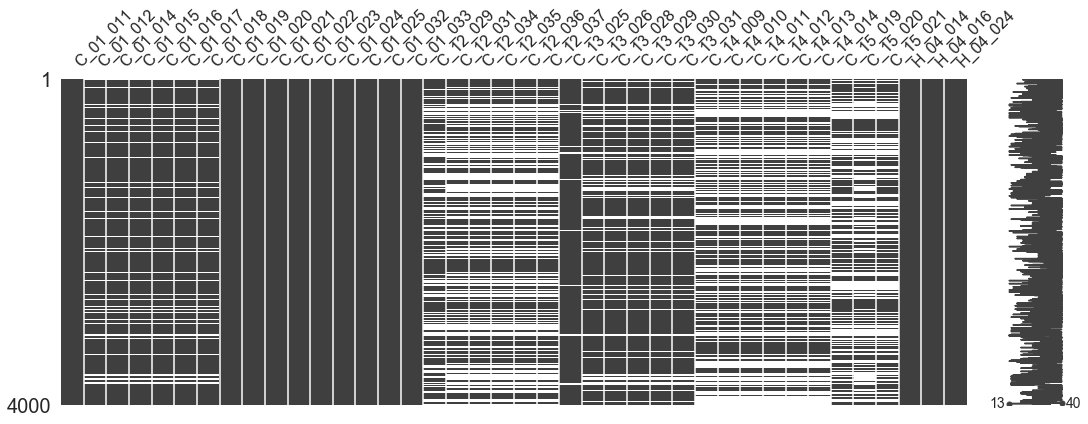

In [13]:
msno.matrix(df, figsize=(18,6))

- Ex) C_01_012 부터 C_01_018 까지의 결측값
    - 바로 전 C_01_011 질문
    - Q. 귀하께서는 평소 TV를 시청하시면서 프로그램 전/중간/후에 나오는 광고를 얼마나 많이 보시는 편입니까?
    - A. '전혀 관심있게 보지 않는다.' 로 응답한 설문
    - TV 매체로 분석 시 제외하고 분석
---
- -> 나머지 결측값도 위와 마찬가지로 다른 값으로 대체하지 않고 제외하고 분석

## unique value

In [14]:
df.describe()

,C_01_011,C_01_012,C_01_014,C_01_015,C_01_016,C_01_017,C_01_018,C_01_019,C_01_020,C_01_021,...,C_14_011,C_14_012,C_14_013,C_14_014,C_15_019,C_15_020,C_15_021,H_04_014,H_04_016,H_04_024
count,4000,3684.0,3684.0,3684.0,3684.0,3684.0,3684.0,4000,4000,4000,...,2216.0,2216.0,2216.0,2216.0,2473.0,2257.0,2473.0,4000,4000,4000
unique,8,8.0,12.0,12.0,12.0,12.0,12.0,12,12,12,...,13.0,13.0,13.0,13.0,9.0,9.0,13.0,12,12,12
top,2,3.0,3.0,3.0,4.0,3.0,3.0,3,4,3,...,3.0,3.0,3.0,3.0,3.0,3.0,2.0,4,4,4
freq,1878,2299.0,1434.0,1540.0,1157.0,1393.0,1524.0,1416,1641,1314,...,750.0,776.0,723.0,727.0,1128.0,1444.0,839.0,1573,1648,1587


-> unique 값이 보기 개수와 다름, 확인 요망

In [15]:
len(re.findall(" ", str(df))) # 1850개 공백 존재

1850

In [16]:
for x in df.columns: # 공백 제거
    df[x] = df[x].str.strip()
    
df.describe()

,C_01_011,C_01_012,C_01_014,C_01_015,C_01_016,C_01_017,C_01_018,C_01_019,C_01_020,C_01_021,...,C_14_011,C_14_012,C_14_013,C_14_014,C_15_019,C_15_020,C_15_021,H_04_014,H_04_016,H_04_024
count,255,224,224,224,224,224,224,255,255,255,...,350,350,350,350,375,353,375,255,255,255
unique,4,4,6,6,6,6,6,6,6,6,...,7,7,7,7,5,5,7,6,6,6
top,2,3,3,3,3,3,3,3,4,3,...,3,3,3,3,3,3,2,4,4,4
freq,113,157,93,107,80,97,106,106,121,95,...,153,164,155,154,203,264,164,86,101,100


-> 아직 이상한 값이 있다. 확인 요망

In [17]:
df.C_14_011.unique() # '#NULL!' 값 존재

array(['4', nan, '5', '2', '3', '1', '6', '#NULL!'], dtype=object)

In [18]:
df = df.replace("#NULL!", np.nan) # '#NULL' 값 제거

df[df.columns[:10]].describe()

,C_01_011,C_01_012,C_01_014,C_01_015,C_01_016,C_01_017,C_01_018,C_01_019,C_01_020,C_01_021
count,255,224,224,224,224,224,224,255,255,255
unique,4,4,6,6,6,6,6,6,6,6
top,2,3,3,3,3,3,3,3,4,3
freq,113,157,93,107,80,97,106,106,121,95


In [19]:
df[df.columns[11:20]].describe()

,C_01_023,C_01_024,C_01_025,C_01_032,C_01_033,C_12_029,C_12_031,C_12_034,C_12_035
count,255,255,255,255,255,220,201,201,201
unique,6,6,6,2,2,4,4,6,6
top,3,3,3,2,2,3,3,3,3
freq,114,100,85,178,200,127,158,93,91


In [20]:
df[df.columns[21:30]].describe()

,C_12_037,C_13_025,C_13_026,C_13_028,C_13_029,C_13_030,C_13_031,C_14_009,C_14_010
count,201,251,222,222,222,222,222,349,349
unique,6,4,4,5,6,6,6,6,6
top,3,3,3,3,3,3,2,3,4
freq,89,135,172,109,91,82,81,152,154


In [21]:
df[df.columns[31:]].describe()

,C_14_012,C_14_013,C_14_014,C_15_019,C_15_020,C_15_021,H_04_014,H_04_016,H_04_024
count,349,349,349,374,352,374,255,255,255
unique,6,6,6,4,4,6,6,6,6
top,3,3,3,3,3,2,4,4,4
freq,164,155,154,203,264,164,86,101,100


-> 보기 개수와 모두 일치!

## data type

In [22]:
df.dtypes

C_01_011    object
C_01_012    object
C_01_014    object
C_01_015    object
C_01_016    object
C_01_017    object
C_01_018    object
C_01_019    object
C_01_020    object
C_01_021    object
C_01_022    object
C_01_023    object
C_01_024    object
C_01_025    object
C_01_032    object
C_01_033    object
C_12_029    object
C_12_031    object
C_12_034    object
C_12_035    object
C_12_036    object
C_12_037    object
C_13_025    object
C_13_026    object
C_13_028    object
C_13_029    object
C_13_030    object
C_13_031    object
C_14_009    object
C_14_010    object
C_14_011    object
C_14_012    object
C_14_013    object
C_14_014    object
C_15_019    object
C_15_020    object
C_15_021    object
H_04_014    object
H_04_016    object
H_04_024    object
dtype: object

-> 순서형 척도(이산형)로 변환, but, 해석에 유의

In [23]:
df = df.fillna(0) # nan을 0으로 변환
for c in df.columns:
    df.loc[:, c] = df.loc[:, c].astype('int') # int 로 변환
    
df.dtypes

C_01_011    int32
C_01_012    int32
C_01_014    int32
C_01_015    int32
C_01_016    int32
C_01_017    int32
C_01_018    int32
C_01_019    int32
C_01_020    int32
C_01_021    int32
C_01_022    int32
C_01_023    int32
C_01_024    int32
C_01_025    int32
C_01_032    int32
C_01_033    int32
C_12_029    int32
C_12_031    int32
C_12_034    int32
C_12_035    int32
C_12_036    int32
C_12_037    int32
C_13_025    int32
C_13_026    int32
C_13_028    int32
C_13_029    int32
C_13_030    int32
C_13_031    int32
C_14_009    int32
C_14_010    int32
C_14_011    int32
C_14_012    int32
C_14_013    int32
C_14_014    int32
C_15_019    int32
C_15_020    int32
C_15_021    int32
H_04_014    int32
H_04_016    int32
H_04_024    int32
dtype: object

In [24]:
df.head()

,C_01_011,C_01_012,C_01_014,C_01_015,C_01_016,C_01_017,C_01_018,C_01_019,C_01_020,C_01_021,...,C_14_011,C_14_012,C_14_013,C_14_014,C_15_019,C_15_020,C_15_021,H_04_014,H_04_016,H_04_024
1,2,2,5,4,4,6,6,6,6,6,...,4,3,5,5,0,0,0,3,4,2
2,2,2,3,2,2,2,3,3,4,2,...,4,5,4,5,0,0,0,5,5,4
3,1,1,5,5,6,6,5,5,4,5,...,0,0,0,0,2,2,4,4,5,4
4,3,4,3,3,3,3,3,2,2,2,...,0,0,0,0,3,4,2,4,3,3
5,2,2,5,4,4,4,3,6,6,5,...,5,5,6,4,3,3,2,3,2,1


# Visualization & EDA(Exploratory Data Analysis)

## Mobile

In [25]:
rawdata = pd.read_excel("rawdata.xlsx")
data = rawdata.copy()

In [26]:
usedata = data.loc[:,['C_01_011','C_01_012','C_01_014','C_01_015','C_01_016','C_01_017','C_01_018','C_01_019','C_01_020','C_01_021','C_01_022','C_01_023','C_01_024','C_01_025','C_01_033','C_14_007','C_14_009','C_14_010','C_14_011','C_14_012','C_14_013','C_14_014','H_04_014','H_04_016','H_04_024','C_12_029','C_12_031','C_12_033','C_12_034','C_12_035','C_12_036','C_12_037','C_13_025','C_13_026','C_13_027','C_13_028','C_13_029','C_13_030','C_13_031','C_15_019','C_15_020','C_15_021','C_13_037']]

In [27]:
#모바일 추출
moblie = usedata.loc[:,['C_13_025','C_13_026','C_13_027','C_13_028','C_13_029','C_13_030','C_13_031','C_13_037']]
  
#결측값 제거
usemoblie = moblie.dropna(axis=0)

# 1행 제거
usemoblie = usemoblie.loc[1:]

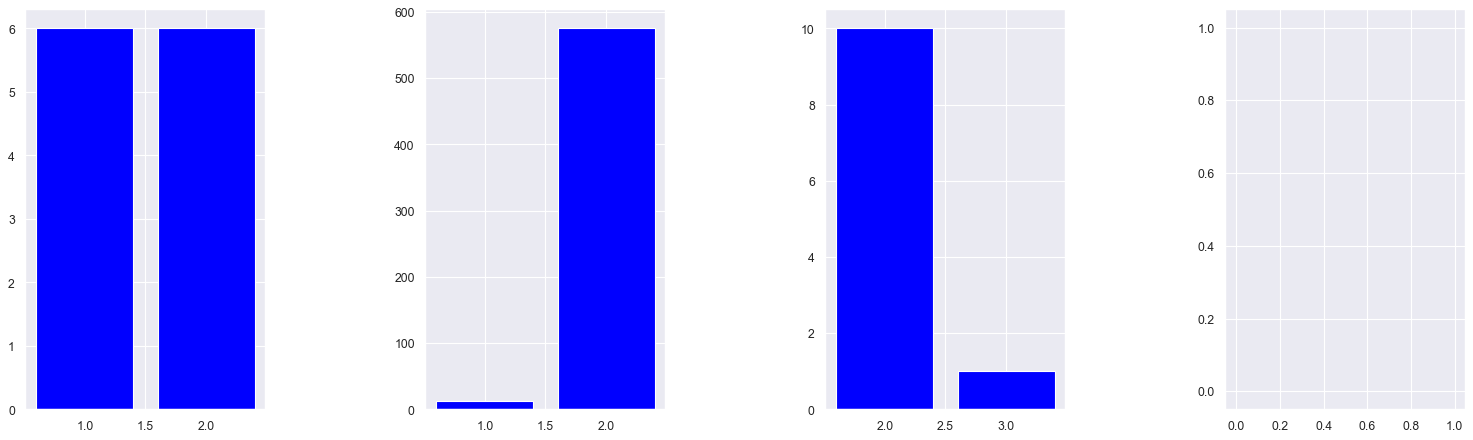

In [28]:
#모바일 주목도별 관심도 선택 도수분포표
a1=usemoblie.C_13_026[usemoblie.C_13_025 ==1].value_counts()
a2=usemoblie.C_13_026[usemoblie.C_13_025 ==2].value_counts()
a3=usemoblie.C_13_026[usemoblie.C_13_025 ==3].value_counts()
a4=usemoblie.C_13_026[usemoblie.C_13_025 ==4].value_counts()

#모바일 주목도별 관심도 바차트
fig=plt.figure(figsize=(10,5),dpi=80)   
axes1=fig.add_axes([0,0,0.3,1])
axes2=fig.add_axes([0.5,0,0.3,1])
axes3=fig.add_axes([1.0,0,0.3,1])
axes4=fig.add_axes([1.5,0,0.3,1])
axes1.bar(a1.index,a1.values,color='blue')
axes2.bar(a2.index,a2.values,color='blue')
axes3.bar(a3.index,a3.values,color='blue')
axes4.bar(a4.index,a4.values,color='blue')

plt.show()

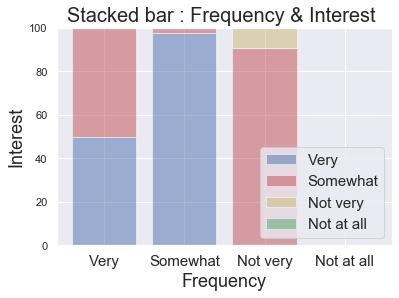

In [29]:
#모바일 광고 주목도별 관심도 %
moblie_a1=usemoblie.C_13_026[usemoblie.C_13_025 ==1].value_counts() 
moblie_a2=usemoblie.C_13_026[usemoblie.C_13_025 ==2].value_counts()
moblie_a3=usemoblie.C_13_026[usemoblie.C_13_025 ==3].value_counts()
moblie_a4=usemoblie.C_13_026[usemoblie.C_13_025 ==4].value_counts()

moblie_fq_1=moblie_a1/moblie_a1.sum()*100
moblie_fq_2=moblie_a2/moblie_a2.sum()*100
moblie_fq_3=moblie_a3/moblie_a3.sum()*100
moblie_fq_4=moblie_a4/moblie_a4.sum()*100

moblie_fq_1.index = ['Very', 'Somewhat']
moblie_fq_2.index = ['Very', 'Somewhat']
moblie_fq_3.index = ['Somewhat', 'Not very']

moblie_fq_1 = pd.Series(data=moblie_fq_1, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
moblie_fq_1[2] = 0
moblie_fq_1[3] = 0
moblie_fq_2 = pd.Series(data=moblie_fq_2, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
moblie_fq_2[2] = 0
moblie_fq_2[3] = 0
moblie_fq_3 = pd.Series(data=moblie_fq_3, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
moblie_fq_3[0] = 0
moblie_fq_3[3] = 0
moblie_fq_4 = pd.Series(data=moblie_fq_4, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
for i in np.arange(0, 4):
    moblie_fq_4[i] = 0

moblie_a1,moblie_a2, moblie_a3, moblie_a4 = [], [], [], []
for i in [moblie_fq_1, moblie_fq_2, moblie_fq_3, moblie_fq_4]:
    moblie_a1.append(i[0])
for i in [moblie_fq_1, moblie_fq_2, moblie_fq_3, moblie_fq_4]:
    moblie_a2.append(i[1])
for i in [moblie_fq_1, moblie_fq_2, moblie_fq_3, moblie_fq_4]:
    moblie_a3.append(i[2])
for i in [moblie_fq_1, moblie_fq_2, moblie_fq_3, moblie_fq_4]:
    moblie_a4.append(i[3])

moblie_a_fq_1 = pd.Series(data=moblie_a1, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
moblie_a_fq_2 = pd.Series(data=moblie_a2, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
moblie_a_fq_3 = pd.Series(data=moblie_a3, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
moblie_a_fq_4 = pd.Series(data=moblie_a4, index=['Very', 'Somewhat', 'Not very', 'Not at all'])


index = np.arange(0, 4)
alpha = 0.5

p1 = plt.bar(index, moblie_a_fq_1, color='b', alpha=alpha)
p2 = plt.bar(index, moblie_a_fq_2, color='r', alpha=alpha, bottom=moblie_a_fq_1) # stacked bar chart
p3 = plt.bar(index, moblie_a_fq_3, color='y', alpha=alpha, bottom=moblie_a_fq_1 + moblie_a_fq_2) # stacked bar chart
p4 = plt.bar(index, moblie_a_fq_4, color='g', alpha=alpha, bottom=moblie_a_fq_1 + moblie_a_fq_2 + moblie_a_fq_3) # stacked bar chart
plt.title('Stacked bar : Frequency & Interest ', fontsize=20)
plt.ylabel('Interest', fontsize=18)
plt.xlabel('Frequency', fontsize=18)
plt.xticks(index, moblie_a_fq_1.index, fontsize=15)
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Very', 'Somewhat', 'Not very', 'Not at all'), fontsize=15)
plt.show()

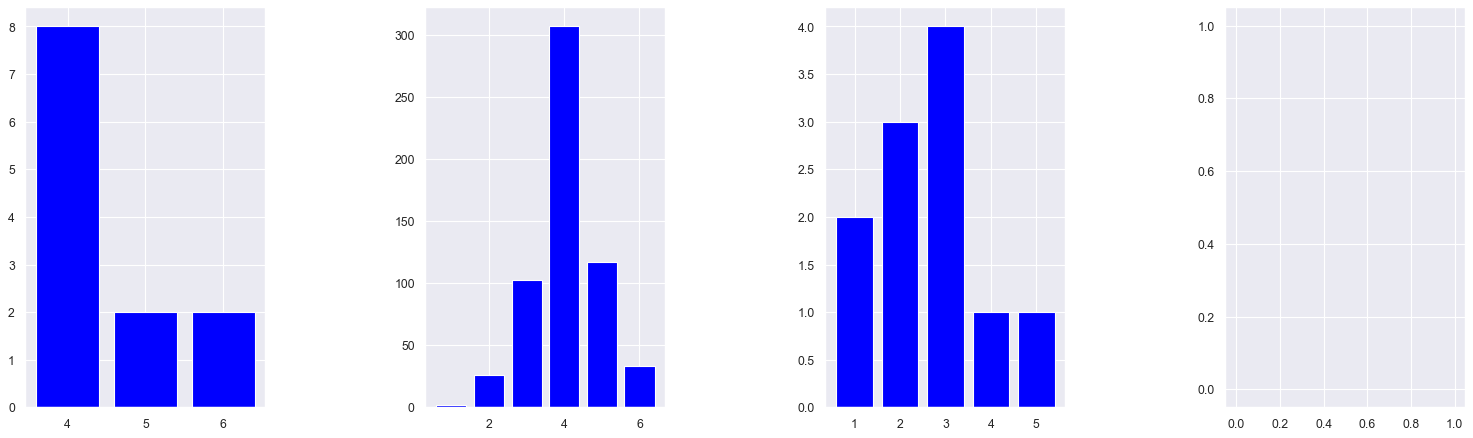

In [30]:
#모바일 주목도별 동영상 광고 집중도 선택 도수분포표
c1=usemoblie.C_13_029[usemoblie.C_13_025 ==1].value_counts() 
c2=usemoblie.C_13_029[usemoblie.C_13_025 ==2].value_counts()
c3=usemoblie.C_13_029[usemoblie.C_13_025 ==3].value_counts()
c4=usemoblie.C_13_029[usemoblie.C_13_025 ==4].value_counts()

#모바일 주목도별 동영상 광고 집중도 바차트
fig=plt.figure(figsize=(10,5),dpi=80)   
axes1=fig.add_axes([0,0,0.3,1])
axes2=fig.add_axes([0.5,0,0.3,1])
axes3=fig.add_axes([1.0,0,0.3,1])
axes4=fig.add_axes([1.5,0,0.3,1])

axes1.bar(c1.index,c1.values,color='blue')
axes2.bar(c2.index,c2.values,color='blue')
axes3.bar(c3.index,c3.values,color='blue')
axes4.bar(c4.index,c4.values,color='blue')

plt.show()

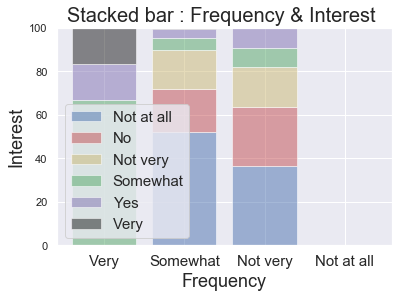

In [31]:
#모바일 주목도별 동영상 광고 집중도 선택 도수분포표
c1=usemoblie.C_13_029[usemoblie.C_13_025 ==1].value_counts() 
c2=usemoblie.C_13_029[usemoblie.C_13_025 ==2].value_counts()
c3=usemoblie.C_13_029[usemoblie.C_13_025 ==3].value_counts()
c4=usemoblie.C_13_029[usemoblie.C_13_025 ==4].value_counts()

moblie_fq_1=c1/c1.sum()*100
moblie_fq_2=c2/c2.sum()*100
moblie_fq_3=c3/c3.sum()*100
moblie_fq_4=c4/c4.sum()*100

moblie_fq_1.index = ['Somewhat', 'Yes', 'Very']
moblie_fq_2.index = ['Not at all', 'No', 'Not very', 'Somewhat', 'Yes', 'Very']
moblie_fq_3.index = ['Not at all', 'No', 'Not very', 'Somewhat', 'Yes']

moblie_fq_1 = pd.Series(data=moblie_fq_1, index=['Not at all', 'No', 'Not very', 'Somewhat', 'Yes', 'Very'])
moblie_fq_1[0] = 0
moblie_fq_1[1] = 0
moblie_fq_1[2] = 0
#moblie_fq_2 = pd.Series(data=moblie_fq_2, index=['1','2','3','4','5','6'])
#moblie_fq_2[2] = 0
#moblie_fq_2[3] = 0
moblie_fq_3 = pd.Series(data=moblie_fq_3, index=['Not at all', 'No', 'Not very', 'Somewhat', 'Yes', 'Very'])
moblie_fq_3[5] = 0

moblie_fq_4 = pd.Series(data=moblie_fq_4, index=['Not at all', 'No', 'Not very', 'Somewhat', 'Yes', 'Very'])
for i in np.arange(0, 4):
    moblie_fq_4[i] = 0



in_list1,in_list2, in_list3, in_list4, in_list5, in_list6 = [], [], [], [], [], []
for i in [moblie_fq_1, moblie_fq_2, moblie_fq_3, moblie_fq_4]:
    in_list1.append(i[0])
    in_list2.append(i[1])
    in_list3.append(i[2])
    in_list4.append(i[3])
    in_list5.append(i[4])
    in_list6.append(i[5])
    
in_r_fq_1 = pd.Series(data=in_list1, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
in_r_fq_2 = pd.Series(data=in_list2, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
in_r_fq_3 = pd.Series(data=in_list3, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
in_r_fq_4 = pd.Series(data=in_list4, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
in_r_fq_5 = pd.Series(data=in_list5, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
in_r_fq_6 = pd.Series(data=in_list6, index=['Very', 'Somewhat', 'Not very', 'Not at all'])

index = np.arange(0, 4)
alpha = 0.5

p1 = plt.bar(index, in_r_fq_1, color='b', alpha=alpha)
p2 = plt.bar(index, in_r_fq_2, color='r', alpha=alpha, bottom=in_r_fq_1) # stacked bar chart
p3 = plt.bar(index, in_r_fq_3, color='y', alpha=alpha, bottom=in_r_fq_1 + in_r_fq_2) # stacked bar chart
p4 = plt.bar(index, in_r_fq_4, color='g', alpha=alpha, bottom=in_r_fq_1 + in_r_fq_2 + in_r_fq_3) # stacked bar chart
p5 = plt.bar(index, in_r_fq_5, color='m', alpha=alpha, bottom=in_r_fq_1 + in_r_fq_2 + in_r_fq_3 + in_r_fq_4) # stacked bar chart
p6 = plt.bar(index, in_r_fq_6, color='k', alpha=alpha, bottom=in_r_fq_1 + in_r_fq_2 + in_r_fq_3 + in_r_fq_4 + in_r_fq_5 ) # stacked bar chart
plt.title('Stacked bar : Frequency & Interest ', fontsize=20)
plt.ylabel('Interest', fontsize=18)
plt.xlabel('Frequency', fontsize=18)
plt.xticks(index, in_r_fq_1.index, fontsize=15)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('Not at all', 'No', 'Not very', 'Somewhat', 'Yes', 'Very'), fontsize=15)
plt.rcParams["figure.figsize"] = 15, 8
plt.show()

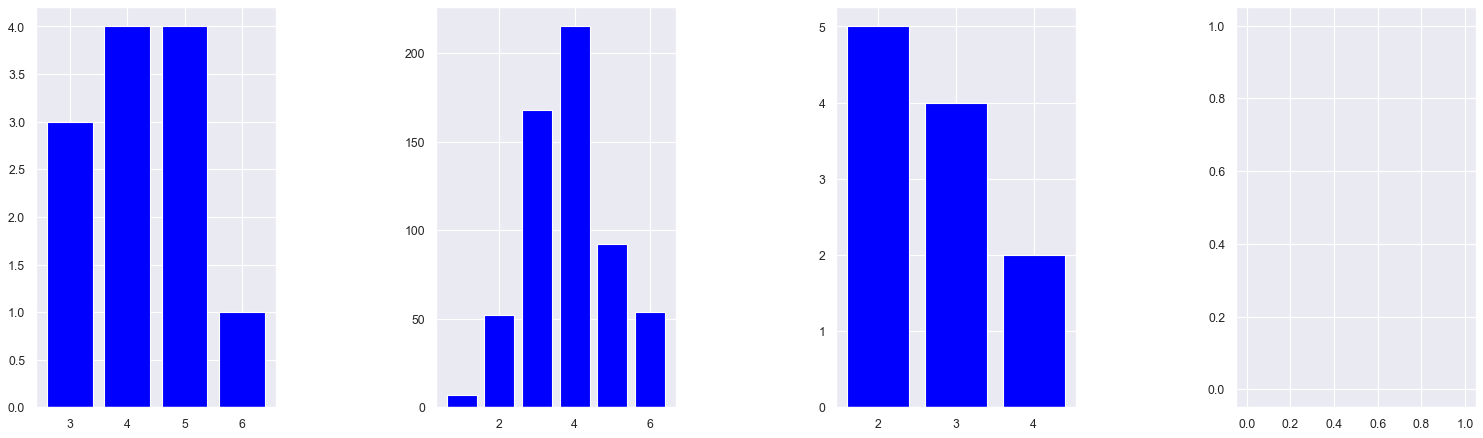

In [32]:
#모바일 주목도별 리워드 광고 집중도 선택 도수분포표
e1=usemoblie.C_13_031[usemoblie.C_13_025 ==1].value_counts() 
e2=usemoblie.C_13_031[usemoblie.C_13_025 ==2].value_counts()
e3=usemoblie.C_13_031[usemoblie.C_13_025 ==3].value_counts()
e4=usemoblie.C_13_031[usemoblie.C_13_025 ==4].value_counts()

#모바일 주목도별 리워드 광고 집중도 바차트
fig=plt.figure(figsize=(10,5),dpi=80)   
axes1=fig.add_axes([0,0,0.3,1])
axes2=fig.add_axes([0.5,0,0.3,1])
axes3=fig.add_axes([1.0,0,0.3,1])
axes4=fig.add_axes([1.5,0,0.3,1])

axes1.bar(e1.index,e1.values,color='blue')
axes2.bar(e2.index,e2.values,color='blue')
axes3.bar(e3.index,e3.values,color='blue')
axes4.bar(e4.index,e4.values,color='blue')

plt.show()

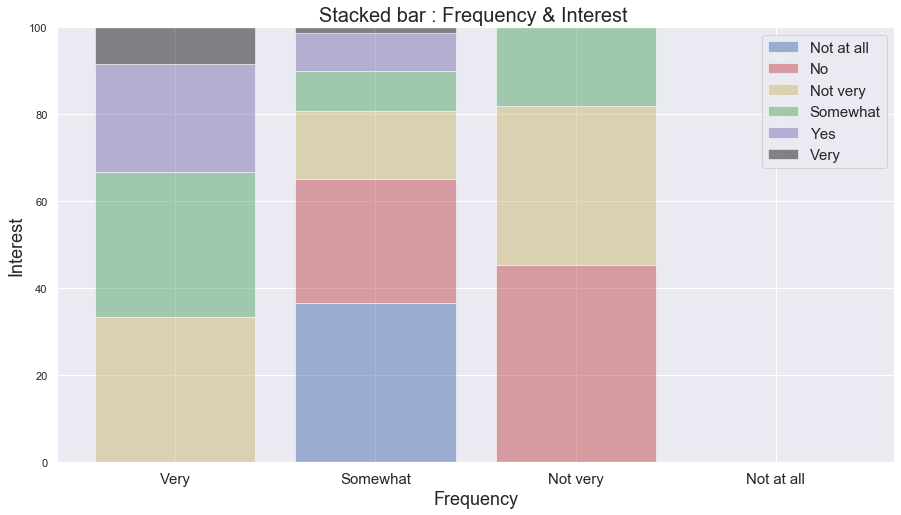

In [33]:
#모바일 주목도별 리워드 광고 집중도 선택 도수분포표
e1=usemoblie.C_13_031[usemoblie.C_13_025 ==1].value_counts() 
e2=usemoblie.C_13_031[usemoblie.C_13_025 ==2].value_counts()
e3=usemoblie.C_13_031[usemoblie.C_13_025 ==3].value_counts()
e4=usemoblie.C_13_031[usemoblie.C_13_025 ==4].value_counts()

moblie_fq_1=e1/e1.sum()*100
moblie_fq_2=e2/e2.sum()*100
moblie_fq_3=e3/e3.sum()*100
moblie_fq_4=e4/e4.sum()*100

moblie_fq_1.index = ['Not very', 'Somewhat', 'Yes', 'Very']
moblie_fq_2.index = ['Not at all', 'No', 'Not very', 'Somewhat', 'Yes', 'Very']
moblie_fq_3.index = ['No', 'Not very', 'Somewhat']

moblie_fq_1 = pd.Series(data=moblie_fq_1, index=['Not at all', 'No', 'Not very', 'Somewhat', 'Yes', 'Very'])
moblie_fq_1[0] = 0
moblie_fq_1[1] = 0

#moblie_fq_2 = pd.Series(data=moblie_fq_2, index=['1','2','3','4','5','6'])
#moblie_fq_2[2] = 0
#moblie_fq_2[3] = 0
moblie_fq_3 = pd.Series(data=moblie_fq_3, index=['Not at all', 'No', 'Not very', 'Somewhat', 'Yes', 'Very'])
moblie_fq_3[0] = 0
moblie_fq_3[4] = 0
moblie_fq_3[5] = 0

moblie_fq_4 = pd.Series(data=moblie_fq_4, index=['Not at all', 'No', 'Not very', 'Somewhat', 'Yes', 'Very'])
for i in np.arange(0, 4):
    moblie_fq_4[i] = 0



in_list1,in_list2, in_list3, in_list4, in_list5, in_list6 = [], [], [], [], [], []
for i in [moblie_fq_1, moblie_fq_2, moblie_fq_3, moblie_fq_4]:
    in_list1.append(i[0])
    in_list2.append(i[1])
    in_list3.append(i[2])
    in_list4.append(i[3])
    in_list5.append(i[4])
    in_list6.append(i[5])
    
in_r_fq_1 = pd.Series(data=in_list1, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
in_r_fq_2 = pd.Series(data=in_list2, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
in_r_fq_3 = pd.Series(data=in_list3, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
in_r_fq_4 = pd.Series(data=in_list4, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
in_r_fq_5 = pd.Series(data=in_list5, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
in_r_fq_6 = pd.Series(data=in_list6, index=['Very', 'Somewhat', 'Not very', 'Not at all'])

index = np.arange(0, 4)
alpha = 0.5

p1 = plt.bar(index, in_r_fq_1, color='b', alpha=alpha)
p2 = plt.bar(index, in_r_fq_2, color='r', alpha=alpha, bottom=in_r_fq_1) # stacked bar chart
p3 = plt.bar(index, in_r_fq_3, color='y', alpha=alpha, bottom=in_r_fq_1 + in_r_fq_2) # stacked bar chart
p4 = plt.bar(index, in_r_fq_4, color='g', alpha=alpha, bottom=in_r_fq_1 + in_r_fq_2 + in_r_fq_3) # stacked bar chart
p5 = plt.bar(index, in_r_fq_5, color='m', alpha=alpha, bottom=in_r_fq_1 + in_r_fq_2 + in_r_fq_3 + in_r_fq_4) # stacked bar chart
p6 = plt.bar(index, in_r_fq_6, color='k', alpha=alpha, bottom=in_r_fq_1 + in_r_fq_2 + in_r_fq_3 + in_r_fq_4 + in_r_fq_5 ) # stacked bar chart
plt.title('Stacked bar : Frequency & Interest ', fontsize=20)
plt.ylabel('Interest', fontsize=18)
plt.xlabel('Frequency', fontsize=18)
plt.xticks(index, in_r_fq_1.index, fontsize=15)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('Not at all', 'No', 'Not very', 'Somewhat', 'Yes', 'Very'), fontsize=15)
plt.rcParams["figure.figsize"] = 15, 8
plt.show()

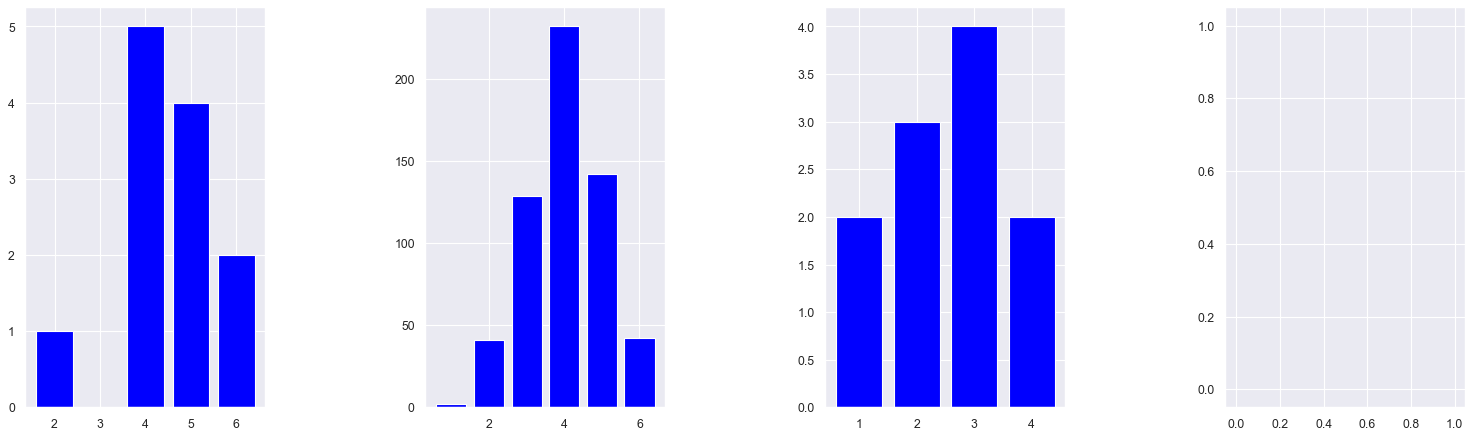

In [34]:
#관심이 제일 높은 집단의 구매
moblie_buy1=usemoblie.C_13_037[usemoblie.C_13_025 ==1].value_counts() 
moblie_buy2=usemoblie.C_13_037[usemoblie.C_13_025 ==2].value_counts()
moblie_buy3=usemoblie.C_13_037[usemoblie.C_13_025 ==3].value_counts()
moblie_buy4=usemoblie.C_13_037[usemoblie.C_13_025 ==4].value_counts()


fig=plt.figure(figsize=(10,5),dpi=80)   
axes1=fig.add_axes([0,0,0.3,1])
axes2=fig.add_axes([0.5,0,0.3,1])
axes3=fig.add_axes([1.0,0,0.3,1])
axes4=fig.add_axes([1.5,0,0.3,1])

axes1.bar(moblie_buy1.index,moblie_buy1.values,color='blue')
axes2.bar(moblie_buy2.index,moblie_buy2.values,color='blue')
axes3.bar(moblie_buy3.index,moblie_buy3.values,color='blue')
axes4.bar(moblie_buy4.index,moblie_buy4.values,color='blue')

plt.show()

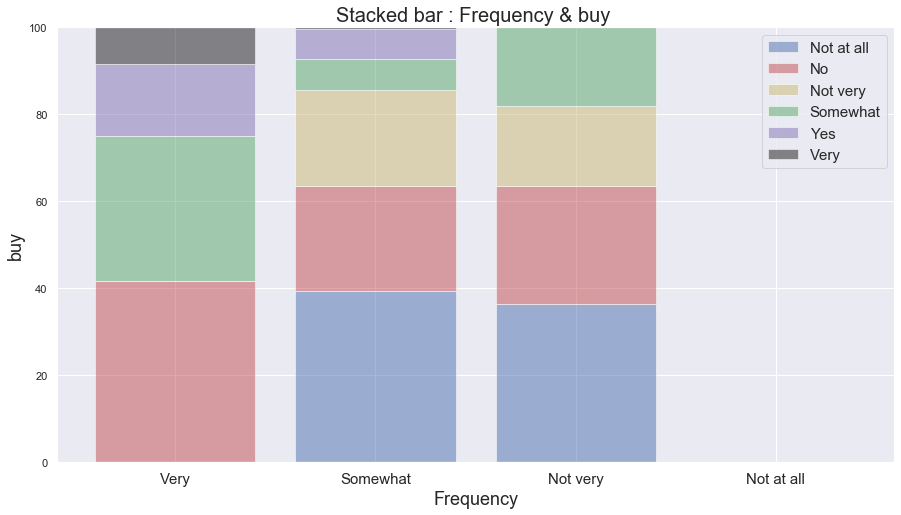

In [35]:
#관심이 제일 높은 집단의 구매
moblie_buy1=usemoblie.C_13_037[usemoblie.C_13_025 ==1].value_counts() 
moblie_buy2=usemoblie.C_13_037[usemoblie.C_13_025 ==2].value_counts()
moblie_buy3=usemoblie.C_13_037[usemoblie.C_13_025 ==3].value_counts()
moblie_buy4=usemoblie.C_13_037[usemoblie.C_13_025 ==4].value_counts()

moblie_fq_1=moblie_buy1/moblie_buy1.sum()*100
moblie_fq_2=moblie_buy2/moblie_buy2.sum()*100
moblie_fq_3=moblie_buy3/moblie_buy3.sum()*100
moblie_fq_4=moblie_buy4/moblie_buy4.sum()*100

moblie_fq_1.index = ['No', 'Somewhat', 'Yes', 'Very']
moblie_fq_2.index = ['Not at all', 'No', 'Not very', 'Somewhat', 'Yes', 'Very']
moblie_fq_3.index = ['Not at all', 'No', 'Not very', 'Somewhat']

moblie_fq_1 = pd.Series(data=moblie_fq_1, index=['Not at all', 'No', 'Not very', 'Somewhat', 'Yes', 'Very'])
moblie_fq_1[0] = 0
moblie_fq_1[2] = 0

#moblie_fq_2 = pd.Series(data=moblie_fq_2, index=['1','2','3','4','5','6'])
#moblie_fq_2[2] = 0
#moblie_fq_2[3] = 0
moblie_fq_3 = pd.Series(data=moblie_fq_3, index=['Not at all', 'No', 'Not very', 'Somewhat', 'Yes', 'Very'])
moblie_fq_3[4] = 0
moblie_fq_3[5] = 0

moblie_fq_4 = pd.Series(data=moblie_fq_4, index=['Not at all', 'No', 'Not very', 'Somewhat', 'Yes', 'Very'])
for i in np.arange(0, 4):
    moblie_fq_4[i] = 0



in_list1,in_list2, in_list3, in_list4, in_list5, in_list6 = [], [], [], [], [], []
for i in [moblie_fq_1, moblie_fq_2, moblie_fq_3, moblie_fq_4]:
    in_list1.append(i[0])
    in_list2.append(i[1])
    in_list3.append(i[2])
    in_list4.append(i[3])
    in_list5.append(i[4])
    in_list6.append(i[5])
    
in_r_fq_1 = pd.Series(data=in_list1, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
in_r_fq_2 = pd.Series(data=in_list2, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
in_r_fq_3 = pd.Series(data=in_list3, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
in_r_fq_4 = pd.Series(data=in_list4, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
in_r_fq_5 = pd.Series(data=in_list5, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
in_r_fq_6 = pd.Series(data=in_list6, index=['Very', 'Somewhat', 'Not very', 'Not at all'])

index = np.arange(0, 4)
alpha = 0.5

p1 = plt.bar(index, in_r_fq_1, color='b', alpha=alpha)
p2 = plt.bar(index, in_r_fq_2, color='r', alpha=alpha, bottom=in_r_fq_1) # stacked bar chart
p3 = plt.bar(index, in_r_fq_3, color='y', alpha=alpha, bottom=in_r_fq_1 + in_r_fq_2) # stacked bar chart
p4 = plt.bar(index, in_r_fq_4, color='g', alpha=alpha, bottom=in_r_fq_1 + in_r_fq_2 + in_r_fq_3) # stacked bar chart
p5 = plt.bar(index, in_r_fq_5, color='m', alpha=alpha, bottom=in_r_fq_1 + in_r_fq_2 + in_r_fq_3 + in_r_fq_4) # stacked bar chart
p6 = plt.bar(index, in_r_fq_6, color='k', alpha=alpha, bottom=in_r_fq_1 + in_r_fq_2 + in_r_fq_3 + in_r_fq_4 + in_r_fq_5 ) # stacked bar chart
plt.title('Stacked bar : Frequency & buy ', fontsize=20)
plt.ylabel('buy', fontsize=18)
plt.xlabel('Frequency', fontsize=18)
plt.xticks(index, in_r_fq_1.index, fontsize=15)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('Not at all', 'No', 'Not very', 'Somewhat', 'Yes', 'Very'), fontsize=15)
plt.rcParams["figure.figsize"] = 15, 8
plt.show()

## SNS

In [36]:
#sns 추출
snss=usedata.loc[:,['C_15_019','C_15_020','C_15_021']]

#결측값 제거
usesns=snss.dropna(axis=0) 
#usesns

# 1행 제거
usesns= usesns.loc[1:]
#usesns

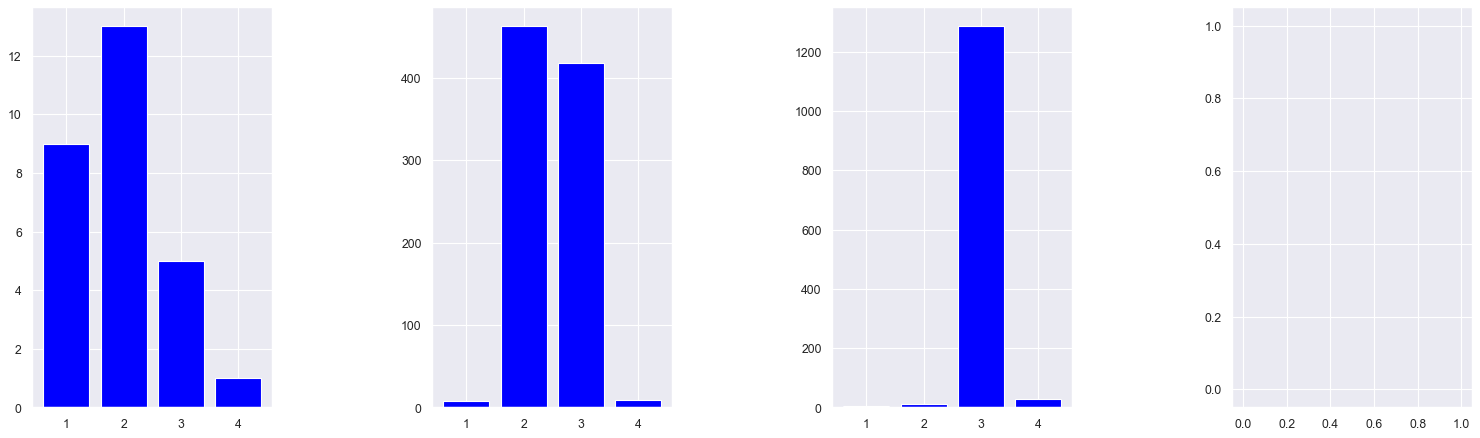

In [37]:
#SNS 주목도별 관심도 선택 도수분포표
sns_a1=usesns.C_15_020[usesns.C_15_019 ==1].value_counts()
sns_a2=usesns.C_15_020[usesns.C_15_019 ==2].value_counts()
sns_a3=usesns.C_15_020[usesns.C_15_019 ==3].value_counts()
sns_a4=usesns.C_15_020[usesns.C_15_019 ==4].value_counts()

#SNS 주목도별 관심도 바차트
fig=plt.figure(figsize=(10,5),dpi=80)   
axes1=fig.add_axes([0,0,0.3,1])
axes2=fig.add_axes([0.5,0,0.3,1])
axes3=fig.add_axes([1.0,0,0.3,1])
axes4=fig.add_axes([1.5,0,0.3,1])
axes1.bar(sns_a1.index,sns_a1.values,color='blue')
axes2.bar(sns_a2.index,sns_a2.values,color='blue')
axes3.bar(sns_a3.index,sns_a3.values,color='blue')
axes4.bar(sns_a4.index,sns_a4.values,color='blue')

plt.show()

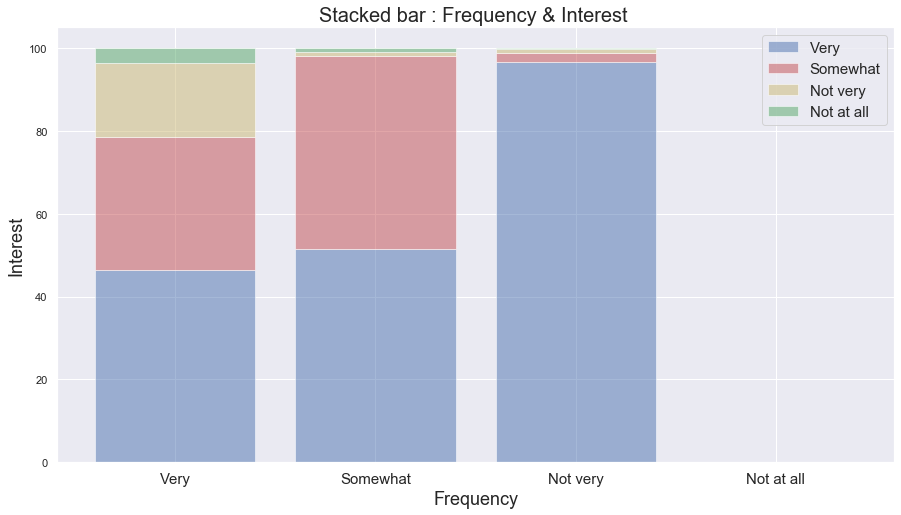

In [38]:
sns_a1=usesns.C_15_020[usesns.C_15_019 ==1].value_counts()
sns_a2=usesns.C_15_020[usesns.C_15_019 ==2].value_counts()
sns_a3=usesns.C_15_020[usesns.C_15_019 ==3].value_counts()
sns_a4=usesns.C_15_020[usesns.C_15_019 ==4].value_counts()

sns_fq_1=sns_a1/sns_a1.sum()*100
sns_fq_2=sns_a2/sns_a2.sum()*100
sns_fq_3=sns_a3/sns_a3.sum()*100
sns_fq_4=sns_a4/sns_a4.sum()*100

sns_fq_1.index = ['Very', 'Somewhat', 'Not very', 'Not at all']
sns_fq_2.index = ['Very', 'Somewhat', 'Not very', 'Not at all']
sns_fq_3.index = ['Very', 'Somewhat', 'Not very', 'Not at all']

#sns_fq_1 = pd.Series(data=sns_fq_1, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
#sns_fq_1[2] = 0
#sns_fq_1[3] = 0
#sns_fq_2 = pd.Series(data=sns_fq_2, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
#sns_fq_2[2] = 0
#sns_fq_2[3] = 0
#sns_fq_3 = pd.Series(data=sns_fq_3, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
#sns_fq_3[0] = 0
#sns_fq_3[3] = 0
sns_fq_4 = pd.Series(data=sns_fq_4, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
for i in np.arange(0, 4):
    sns_fq_4[i] = 0

sns_list1,sns_list2, sns_list3, sns_list4 = [], [], [], []
for i in [sns_fq_1, sns_fq_2, sns_fq_3, sns_fq_4]:
    sns_list1.append(i[0])
for i in [sns_fq_1, sns_fq_2, sns_fq_3, sns_fq_4]:
    sns_list2.append(i[1])
for i in [sns_fq_1, sns_fq_2, sns_fq_3, sns_fq_4]:
    sns_list3.append(i[2])
for i in [sns_fq_1, sns_fq_2, sns_fq_3, sns_fq_4]:
    sns_list4.append(i[3])

sns_a_fq_1 = pd.Series(data=sns_list1, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
sns_a_fq_2 = pd.Series(data=sns_list2, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
sns_a_fq_3 = pd.Series(data=sns_list3, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
sns_a_fq_4 = pd.Series(data=sns_list4, index=['Very', 'Somewhat', 'Not very', 'Not at all'])


index = np.arange(0, 4)
alpha = 0.5

p1 = plt.bar(index, sns_a_fq_1, color='b', alpha=alpha)
p2 = plt.bar(index, sns_a_fq_2, color='r', alpha=alpha, bottom=sns_a_fq_1) # stacked bar chart
p3 = plt.bar(index, sns_a_fq_3, color='y', alpha=alpha, bottom=sns_a_fq_1 + sns_a_fq_2) # stacked bar chart
p4 = plt.bar(index, sns_a_fq_4, color='g', alpha=alpha, bottom=sns_a_fq_1 + sns_a_fq_2 + sns_a_fq_3) # stacked bar chart
plt.title('Stacked bar : Frequency & Interest ', fontsize=20)
plt.ylabel('Interest', fontsize=18)
plt.xlabel('Frequency', fontsize=18)
plt.xticks(index, sns_a_fq_1.index, fontsize=15)
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Very', 'Somewhat', 'Not very', 'Not at all'), fontsize=15)
plt.show()

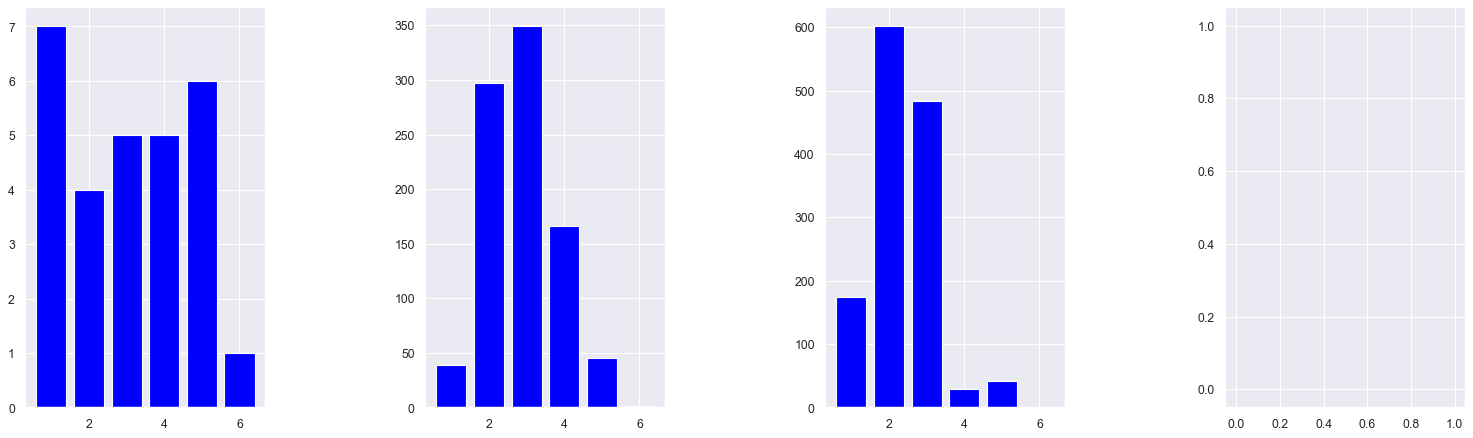

In [39]:
#SNS 주목도별 광고에 대한 인식 도수분포표
sns_a1=usesns.C_15_021[usesns.C_15_019 ==1].value_counts() 
sns_a2=usesns.C_15_021[usesns.C_15_019 ==2].value_counts()
sns_a3=usesns.C_15_021[usesns.C_15_019 ==3].value_counts()
sns_a4=usesns.C_15_021[usesns.C_15_019 ==4].value_counts()

#SNS 주목도별 광고에 대한 인식 바차트
fig=plt.figure(figsize=(10,5),dpi=80)   
axes1=fig.add_axes([0,0,0.3,1])
axes2=fig.add_axes([0.5,0,0.3,1])
axes3=fig.add_axes([1.0,0,0.3,1])
axes4=fig.add_axes([1.5,0,0.3,1])

axes1.bar(sns_a1.index,sns_a1.values,color='blue')
axes2.bar(sns_a2.index,sns_a2.values,color='blue')
axes3.bar(sns_a3.index,sns_a3.values,color='blue')
axes4.bar(sns_a4.index,sns_a4.values,color='blue')

plt.show()

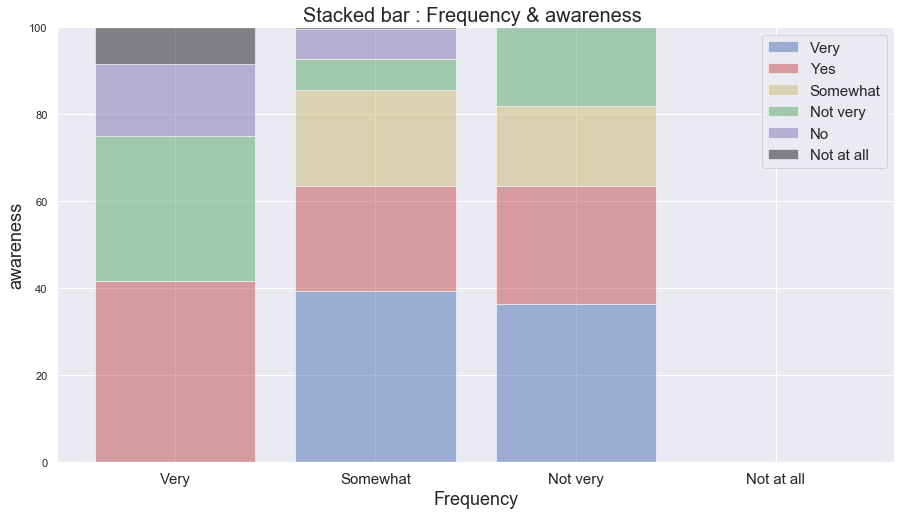

In [40]:
#SNS 주목도별 광고에 대한 인식 도수분포표
sns_a1=usesns.C_15_021[usesns.C_15_019 ==1].value_counts() 
sns_a2=usesns.C_15_021[usesns.C_15_019 ==2].value_counts()
sns_a3=usesns.C_15_021[usesns.C_15_019 ==3].value_counts()
sns_a4=usesns.C_15_021[usesns.C_15_019 ==4].value_counts()

sns_fq_1=sns_a1/sns_a1.sum()*100
sns_fq_2=sns_a1/sns_a1.sum()*100
sns_fq_3=sns_a1/sns_a1.sum()*100
sns_fq_4=sns_a1/sns_a1.sum()*100  

sns_fq_1.index = ['Very','Yes','Somewhat','Not very','No','Not at all']
sns_fq_2.index = ['Very','Yes','Somewhat','Not very','No','Not at all']
sns_fq_3.index = ['Very','Yes','Somewhat','Not very','No','Not at all']

#moblie_fq_1 = pd.Series(data=moblie_fq_1, index=['Not at all', 'No', 'Not very', 'Somewhat', 'Yes', 'Very'])
#moblie_fq_1[0] = 0
#moblie_fq_1[1] = 0
#moblie_fq_1[2] = 0
#moblie_fq_2 = pd.Series(data=moblie_fq_2, index=['1','2','3','4','5','6'])
#moblie_fq_2[2] = 0
#moblie_fq_2[3] = 0
#moblie_fq_3 = pd.Series(data=moblie_fq_3, index=['Not at all', 'No', 'Not very', 'Somewhat', 'Yes', 'Very'])
#moblie_fq_3[5] = 0

moblie_fq_4 = pd.Series(data=moblie_fq_4, index=['Not at all', 'No', 'Not very', 'Somewhat', 'Yes', 'Very'])
for i in np.arange(0, 4):
    moblie_fq_4[i] = 0



in_list1,in_list2, in_list3, in_list4, in_list5, in_list6 = [], [], [], [], [], []
for i in [moblie_fq_1, moblie_fq_2, moblie_fq_3, moblie_fq_4]:
    in_list1.append(i[0])
    in_list2.append(i[1])
    in_list3.append(i[2])
    in_list4.append(i[3])
    in_list5.append(i[4])
    in_list6.append(i[5])
    
in_r_fq_1 = pd.Series(data=in_list1, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
in_r_fq_2 = pd.Series(data=in_list2, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
in_r_fq_3 = pd.Series(data=in_list3, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
in_r_fq_4 = pd.Series(data=in_list4, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
in_r_fq_5 = pd.Series(data=in_list5, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
in_r_fq_6 = pd.Series(data=in_list6, index=['Very', 'Somewhat', 'Not very', 'Not at all'])

index = np.arange(0, 4)
alpha = 0.5

p1 = plt.bar(index, in_r_fq_1, color='b', alpha=alpha)
p2 = plt.bar(index, in_r_fq_2, color='r', alpha=alpha, bottom=in_r_fq_1) # stacked bar chart
p3 = plt.bar(index, in_r_fq_3, color='y', alpha=alpha, bottom=in_r_fq_1 + in_r_fq_2) # stacked bar chart
p4 = plt.bar(index, in_r_fq_4, color='g', alpha=alpha, bottom=in_r_fq_1 + in_r_fq_2 + in_r_fq_3) # stacked bar chart
p5 = plt.bar(index, in_r_fq_5, color='m', alpha=alpha, bottom=in_r_fq_1 + in_r_fq_2 + in_r_fq_3 + in_r_fq_4) # stacked bar chart
p6 = plt.bar(index, in_r_fq_6, color='k', alpha=alpha, bottom=in_r_fq_1 + in_r_fq_2 + in_r_fq_3 + in_r_fq_4 + in_r_fq_5 ) # stacked bar chart
plt.title('Stacked bar : Frequency & awareness ', fontsize=20)
plt.ylabel('awareness', fontsize=18)
plt.xlabel('Frequency', fontsize=18)
plt.xticks(index, in_r_fq_1.index, fontsize=15)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('Very','Yes','Somewhat','Not very','No','Not at all'), fontsize=15)
plt.rcParams["figure.figsize"] = 12, 7
plt.show()

## TV

In [41]:
#데이터 분할
usedata = data.loc[:,['C_01_011','C_01_012','C_01_014','C_01_015','C_01_016','C_01_017','C_01_018','C_01_019','C_01_020','C_01_021','C_01_022','C_01_023','C_01_024','C_01_025','C_01_033','C_14_007','C_14_009','C_14_010','C_14_011','C_14_012','C_14_013','C_14_014','H_04_014','H_04_016','H_04_024','C_12_029','C_12_031','C_12_033','C_12_034','C_12_035','C_12_036','C_12_037','C_12_060','C_13_025','C_13_026','C_13_027','C_13_028','C_13_029','C_13_030','C_13_031','C_15_019','C_15_020','C_15_021']]

#tv만 추출
tv = usedata.loc[:,['C_01_011','C_01_012','C_01_014','C_01_015','C_01_016','C_01_017','C_01_018','C_01_019','C_01_020','C_01_021','C_01_022','C_01_023','C_01_024','C_01_025','C_01_033','H_04_016']]

#usetv = tv.dropna(axis=0)   #결측값 제거
usetv = tv.iloc[1:]      #wColumn 질문 설명 제거

- TV광고 노출정도에 따른 TV광고 관심정도 (1 : 매우 관심있게 봄 ~ 4 : 전혀 관심있게 보지 않음)

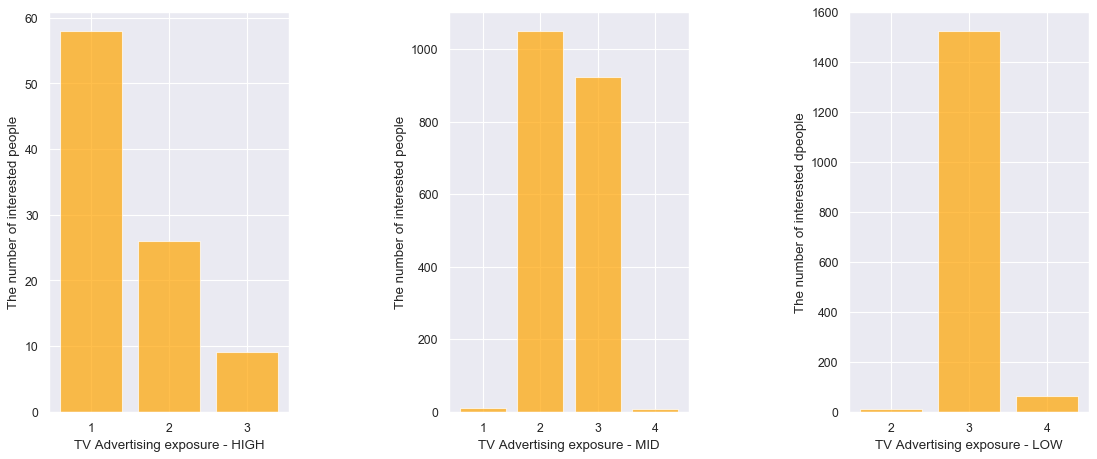

In [42]:
## TV광고 시청 정도에 따른 TV광고 관심도 (1: 많이 봄, 3: 거의 보지 않음)

ex_1 = usetv.C_01_012[usetv.C_01_011 == 1].value_counts()    ## TV광고를 많이 보는 집단
ex_2 = usetv.C_01_012[usetv.C_01_011 == 2].value_counts()    ## TV광고를 어느정도 보는 집단
ex_3 = usetv.C_01_012[usetv.C_01_011 == 3].value_counts()    ## TV광고를 별로 보지 않는 집단
ex_4 = usetv.C_01_012[usetv.C_01_011 == 4].value_counts()    ## TV광고를 아예 보지 않는 집단


## C_01_012에 대한 답변 (1 : 매우 관심 있게 봄, 4 : 전혀 관심 있게 보지 않음)

fig = plt.figure(figsize=(10,5), dpi = 80)
axes1 = fig.add_axes([0, 0, 0.3, 1])
axes2 = fig.add_axes([0.5, 0, 0.3, 1])
axes3 = fig.add_axes([1.0, 0, 0.3, 1])
axes1.bar(ex_1.index, ex_1.values, color = 'orange', alpha=0.7)
axes2.bar(ex_2.index, ex_2.values, color = 'orange', alpha=0.7)
axes3.bar(ex_3.index, ex_3.values, color = 'orange', alpha=0.7)
axes1.set_xlabel('TV Advertising exposure - HIGH')
axes1.set_ylabel('The number of interested people')
axes2.set_xlabel('TV Advertising exposure - MID')
axes2.set_ylabel('The number of interested people')
axes3.set_xlabel('TV Advertising exposure - LOW')
axes3.set_ylabel('The number of interested dpeople')
plt.show()

In [43]:
ex_fq_1 = ex_1 / ex_1.sum() * 100       ## 비율로 계산
ex_fq_2 = ex_2 / ex_2.sum() * 100
ex_fq_3 = ex_3 / ex_3.sum() * 100
ex_fq_4 = ex_4 / ex_4.sum() * 100

ex_fq_1.index = ['Very', 'Somewhat', 'Not very']                        ## Index를 추가한 후 시각화를 위해 Series 새로 생성
ex_fq_2.index = ['Very', 'Somewhat', 'Not very', 'Not at all']
ex_fq_3.index = ['Somewhat', 'Not very', 'Not at all']

ex_fq_1 = pd.Series(data=ex_fq_1, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
ex_fq_1[3] = 0
ex_fq_3 = pd.Series(data=ex_fq_3, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
ex_fq_3[0] = 0
ex_fq_4 = pd.Series(data=ex_fq_4, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
for i in np.arange(0, 4):
    ex_fq_4[i] = 0

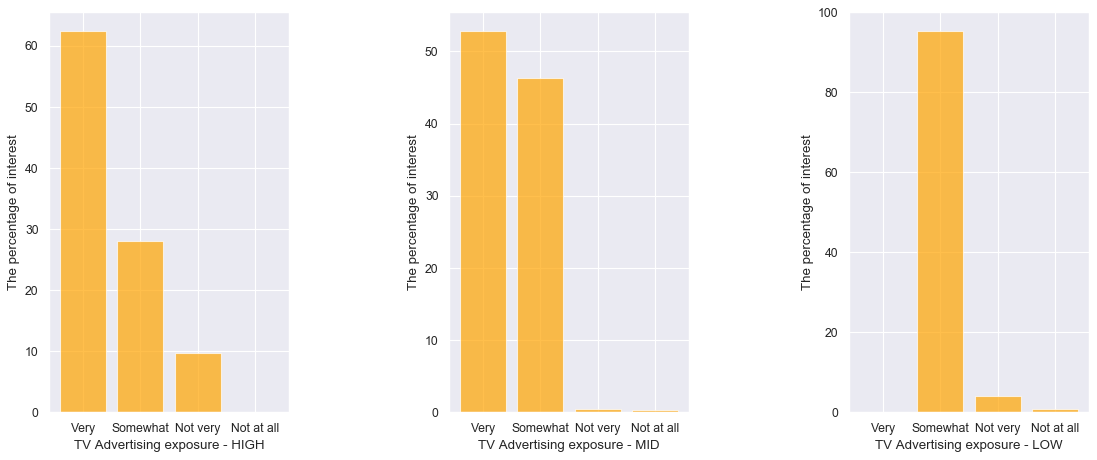

In [44]:
## 더 나은 시각화를 위해 다중 시각화

fig = plt.figure(figsize=(10,5), dpi = 80)
axes1 = fig.add_axes([0, 0, 0.3, 1])
axes2 = fig.add_axes([0.5, 0, 0.3, 1])
axes3 = fig.add_axes([1.0, 0, 0.3, 1])
axes1.bar(ex_fq_1.index, ex_fq_1.values, color = 'orange', alpha=0.7)
axes2.bar(ex_fq_2.index, ex_fq_2.values, color = 'orange', alpha=0.7)
axes3.bar(ex_fq_3.index, ex_fq_3.values, color = 'orange', alpha=0.7)
axes1.set_xlabel('TV Advertising exposure - HIGH')
axes1.set_ylabel('The percentage of interest')
axes2.set_xlabel('TV Advertising exposure - MID')
axes2.set_ylabel('The percentage of interest')
axes3.set_xlabel('TV Advertising exposure - LOW')
axes3.set_ylabel('The percentage of interest')
plt.show()

- TV광고를 많이 보는 사람의 경우 TV광고 관심도가 높은편으로 몰려있음
- => 하지만 TV광고의 노출정도와는 무관하게 어느정도 많은 사람들이 TV광고에 관심을 가지고 있음

In [45]:
ex_list1,ex_list2, ex_list3, ex_list4 = [], [], [], []
for i in [ex_fq_1, ex_fq_2, ex_fq_3, ex_fq_4]:
    ex_list1.append(i[0])
for i in [ex_fq_1, ex_fq_2, ex_fq_3, ex_fq_4]:
    ex_list2.append(i[1])
for i in [ex_fq_1, ex_fq_2, ex_fq_3, ex_fq_4]:
    ex_list3.append(i[2])
for i in [ex_fq_1, ex_fq_2, ex_fq_3, ex_fq_4]:
    ex_list4.append(i[3])

ex_r_fq_1 = pd.Series(data=ex_list1, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
ex_r_fq_2 = pd.Series(data=ex_list2, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
ex_r_fq_3 = pd.Series(data=ex_list3, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
ex_r_fq_4 = pd.Series(data=ex_list4, index=['Very', 'Somewhat', 'Not very', 'Not at all'])

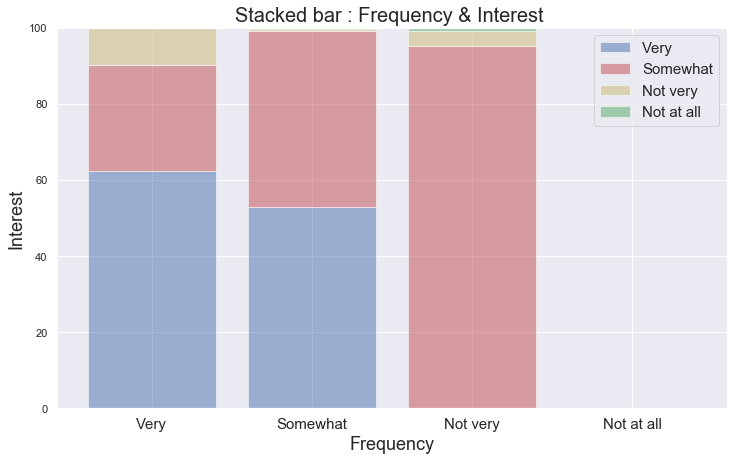

In [46]:
## 더 나은 시각화를 위해 하나의 Stacked Bar graph로 표현 

index = np.arange(0, 4)
alpha = 0.5

p1 = plt.bar(index, ex_r_fq_1, color='b', alpha=alpha)
p2 = plt.bar(index, ex_r_fq_2, color='r', alpha=alpha, bottom=ex_r_fq_1) # stacked bar chart
p3 = plt.bar(index, ex_r_fq_3, color='y', alpha=alpha, bottom=ex_r_fq_1 + ex_r_fq_2) # stacked bar chart
p4 = plt.bar(index, ex_r_fq_4, color='g', alpha=alpha, bottom=ex_r_fq_1 + ex_r_fq_2 + ex_r_fq_3) # stacked bar chart
plt.title('Stacked bar : Frequency & Interest ', fontsize=20)
plt.ylabel('Interest', fontsize=18)
plt.xlabel('Frequency', fontsize=18)
plt.xticks(index, ex_r_fq_1.index, fontsize=15)
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Very', 'Somewhat', 'Not very', 'Not at all'), fontsize=15)
plt.rcParams["figure.figsize"] = 10,3
plt.show()

- TV광고 노출도가 제품 구매 의사결정에 영향을 끼치는지. (1 : 매우 관심있게 봄 ~ 4 : 전혀 관심있게 보지 않음)

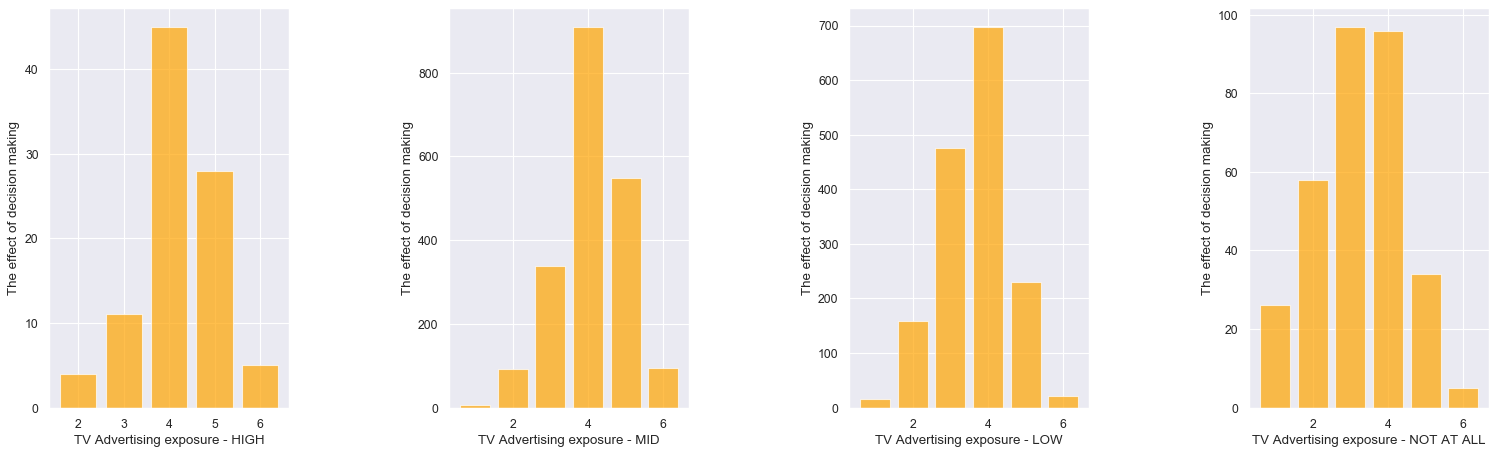

In [47]:
## TV광고 노출도가 제품 구매 의사결정에 영향을 끼치는지. (1 : 많이 보는 편, 4 : 전혀 보지 않음)

in_1 = usetv.H_04_016[usetv.C_01_011 == 1].value_counts()
in_2 = usetv.H_04_016[usetv.C_01_011 == 2].value_counts()
in_3 = usetv.H_04_016[usetv.C_01_011 == 3].value_counts()
in_4 = usetv.H_04_016[usetv.C_01_011 == 4].value_counts()

## H_04_016의 답변 (1: 전혀 아니다, 6: 매우 그렇다)

fig = plt.figure(figsize=(10,5), dpi = 80)
axes4 = fig.add_axes([0, 0, 0.3, 1])
axes5 = fig.add_axes([0.5, 0, 0.3, 1])
axes6 = fig.add_axes([1.0, 0, 0.3, 1])
axes7 = fig.add_axes([1.5, 0, 0.3, 1])

axes4.bar(in_1.index, in_1.values, color = 'orange', alpha=0.7)
axes5.bar(in_2.index, in_2.values, color = 'orange', alpha=0.7)
axes6.bar(in_3.index, in_3.values, color = 'orange', alpha=0.7)
axes7.bar(in_4.index, in_4.values, color = 'orange', alpha=0.7)
axes4.set_xlabel('TV Advertising exposure - HIGH')
axes4.set_ylabel('The effect of decision making')
axes5.set_xlabel('TV Advertising exposure - MID')
axes5.set_ylabel('The effect of decision making')
axes6.set_xlabel('TV Advertising exposure - LOW')
axes6.set_ylabel('The effect of decision making')
axes7.set_xlabel('TV Advertising exposure - NOT AT ALL')
axes7.set_ylabel('The effect of decision making')
plt.show()

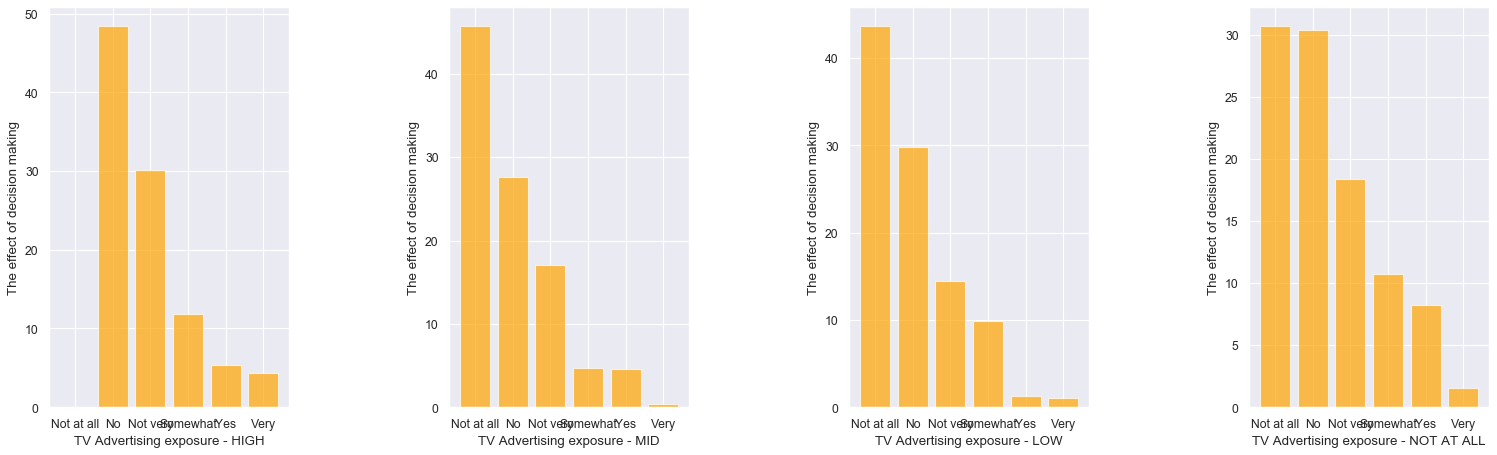

In [48]:
## TV광고 노출도가 제품 구매 의사결정에 영향을 끼치는지. (1 : 많이 보는 편, 4 : 전혀 보지 않음)

in_1 = usetv.H_04_016[usetv.C_01_011 == 1].value_counts()
in_2 = usetv.H_04_016[usetv.C_01_011 == 2].value_counts()
in_3 = usetv.H_04_016[usetv.C_01_011 == 3].value_counts()
in_4 = usetv.H_04_016[usetv.C_01_011 == 4].value_counts()

in_fq_1 = in_1 / in_1.sum() * 100
in_fq_2 = in_2 / in_2.sum() * 100
in_fq_3 = in_3 / in_3.sum() * 100
in_fq_4 = in_4 / in_4.sum() * 100

in_fq_1.index = ['No','Not very', 'Somewhat', 'Yes', 'Very']
in_fq_2.index = ['Not at all', 'No', 'Not very', 'Somewhat', 'Yes', 'Very']
in_fq_3.index = ['Not at all', 'No', 'Not very', 'Somewhat', 'Yes', 'Very']
in_fq_4.index = ['Not at all', 'No', 'Not very', 'Somewhat', 'Yes', 'Very']

in_fq_1 = pd.Series(data=in_fq_1, index=['Not at all', 'No', 'Not very', 'Somewhat', 'Yes', 'Very'])
in_fq_1[0] = 0.0

## H_04_016의 답변 (1: 전혀 아니다, 6: 매우 그렇다)

fig = plt.figure(figsize=(10,5), dpi = 80)
axes4 = fig.add_axes([0, 0, 0.3, 1])
axes5 = fig.add_axes([0.5, 0, 0.3, 1])
axes6 = fig.add_axes([1.0, 0, 0.3, 1])
axes7 = fig.add_axes([1.5, 0, 0.3, 1])

axes4.bar(in_fq_1.index, in_fq_1.values, color = 'orange', alpha=0.7)
axes5.bar(in_fq_2.index, in_fq_2.values, color = 'orange', alpha=0.7)
axes6.bar(in_fq_3.index, in_fq_3.values, color = 'orange', alpha=0.7)
axes7.bar(in_fq_4.index, in_fq_4.values, color = 'orange', alpha=0.7)
axes4.set_xlabel('TV Advertising exposure - HIGH')
axes4.set_ylabel('The effect of decision making')
axes5.set_xlabel('TV Advertising exposure - MID')
axes5.set_ylabel('The effect of decision making')
axes6.set_xlabel('TV Advertising exposure - LOW')
axes6.set_ylabel('The effect of decision making')
axes7.set_xlabel('TV Advertising exposure - NOT AT ALL')
axes7.set_ylabel('The effect of decision making')
plt.show()

- 전체적으로 그래프의 형태가 TV광고가 제품 구매 의사결정에 영향을 끼치지 않은 편으로 몰려있다.

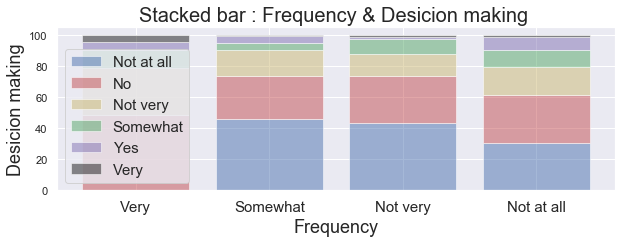

In [49]:
in_list1,in_list2, in_list3, in_list4, in_list5, in_list6 = [], [], [], [], [], []
for i in [in_fq_1, in_fq_2, in_fq_3, in_fq_4]:
    in_list1.append(i[0])
    in_list2.append(i[1])
    in_list3.append(i[2])
    in_list4.append(i[3])
    in_list5.append(i[4])
    in_list6.append(i[5])
    
in_r_fq_1 = pd.Series(data=in_list1, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
in_r_fq_2 = pd.Series(data=in_list2, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
in_r_fq_3 = pd.Series(data=in_list3, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
in_r_fq_4 = pd.Series(data=in_list4, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
in_r_fq_5 = pd.Series(data=in_list5, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
in_r_fq_6 = pd.Series(data=in_list6, index=['Very', 'Somewhat', 'Not very', 'Not at all'])

index = np.arange(0, 4)
alpha = 0.5

p1 = plt.bar(index, in_r_fq_1, color='b', alpha=alpha)
p2 = plt.bar(index, in_r_fq_2, color='r', alpha=alpha, bottom=in_r_fq_1) # stacked bar chart
p3 = plt.bar(index, in_r_fq_3, color='y', alpha=alpha, bottom=in_r_fq_1 + in_r_fq_2) # stacked bar chart
p4 = plt.bar(index, in_r_fq_4, color='g', alpha=alpha, bottom=in_r_fq_1 + in_r_fq_2 + in_r_fq_3) # stacked bar chart
p5 = plt.bar(index, in_r_fq_5, color='m', alpha=alpha, bottom=in_r_fq_1 + in_r_fq_2 + in_r_fq_3 + in_r_fq_4) # stacked bar chart
p6 = plt.bar(index, in_r_fq_6, color='k', alpha=alpha, bottom=in_r_fq_1 + in_r_fq_2 + in_r_fq_3 + in_r_fq_4 + in_r_fq_5 ) # stacked bar chart
plt.title('Stacked bar : Frequency & Desicion making ', fontsize=20)
plt.ylabel('Desicion making', fontsize=18)
plt.xlabel('Frequency', fontsize=18)
plt.xticks(index, in_r_fq_1.index, fontsize=15)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('Not at all', 'No', 'Not very', 'Somewhat', 'Yes', 'Very'), fontsize=15)
plt.rcParams["figure.figsize"] = 15, 10
plt.show()

- => TV광고의 노출 정도에 관계없이 모든 그래프에서 Not very까지 영역이 막대의 80~90%를 차지하는 것을 보아

- TV광고의 노출 정도가 제품의 구매 결정에 영향을 끼치지 않음을 알 수 있다.

## PC

In [50]:
pc=usedata.loc[:,['C_12_029','C_12_031','C_12_033','C_12_034','C_12_035','C_12_036','C_12_037','C_12_060']]  #pc 추출
usepc=pc.dropna(axis=0) #결측값 제거
usepc = usepc.iloc[1:]      #wColumn 질문 설명 제거

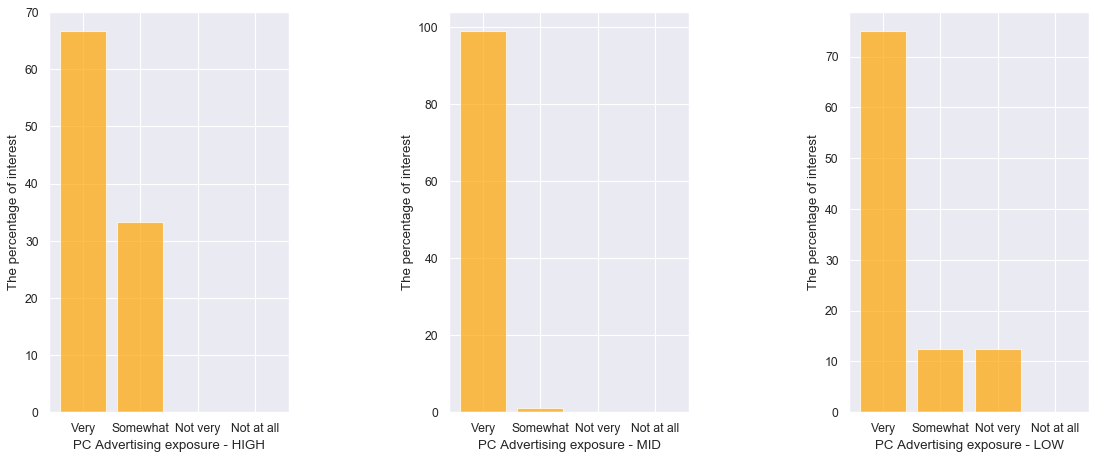

In [51]:
## PC광고 시청 정도에 따른 PC광고 관심도 (1: 많이 봄, 4: 전혀 보지 않음)

pc_ex_1 = usepc.C_12_031[usepc.C_12_029 == 1].value_counts()    ## PC광고를 많이 보는 집단
pc_ex_2 = usepc.C_12_031[usepc.C_12_029 == 2].value_counts()    ## PC광고를 어느정도 보는 집단
pc_ex_3 = usepc.C_12_031[usepc.C_12_029 == 3].value_counts()    ## PC광고를 별로 보지 않는 집단
pc_ex_4 = usepc.C_12_031[usepc.C_12_029 == 4].value_counts()    ## PC광고를 보지 않는 집단

## C_12_031에 대한 답변 (1 : 매우 관심 있게 봄, 4 : 전혀 관심 있게 보지 않음)

pc_ex_fq_1 = pc_ex_1 / pc_ex_1.sum() * 100
pc_ex_fq_2 = pc_ex_2 / pc_ex_2.sum() * 100
pc_ex_fq_3 = pc_ex_3 / pc_ex_3.sum() * 100
pc_ex_fq_4 = pc_ex_4 / pc_ex_4.sum() * 100

pc_ex_fq_1.index = ['Very', 'Somewhat']
pc_ex_fq_2.index = ['Very', 'Somewhat']
pc_ex_fq_3.index = ['Very', 'Somewhat', 'Not very']

pc_ex_fq_1 = pd.Series(data=pc_ex_fq_1, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
pc_ex_fq_1[2] = 0
pc_ex_fq_1[3] = 0
pc_ex_fq_2 = pd.Series(data=pc_ex_fq_2, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
pc_ex_fq_2[2] = 0
pc_ex_fq_2[3] = 0
pc_ex_fq_3 = pd.Series(data=pc_ex_fq_3, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
pc_ex_fq_3[3] = 0
pc_ex_fq_4 = pd.Series(data=pc_ex_fq_4, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
for i in np.arange(0, 4):
    pc_ex_fq_4[i] = 0
    
fig = plt.figure(figsize=(10,5), dpi = 80)
axes1 = fig.add_axes([0, 0, 0.3, 1])
axes2 = fig.add_axes([0.5, 0, 0.3, 1])
axes3 = fig.add_axes([1.0, 0, 0.3, 1])
axes1.bar(pc_ex_fq_1.index, pc_ex_fq_1.values, color = 'orange', alpha=0.7)
axes2.bar(pc_ex_fq_2.index, pc_ex_fq_2.values, color = 'orange', alpha=0.7)
axes3.bar(pc_ex_fq_3.index, pc_ex_fq_3.values, color = 'orange', alpha=0.7)
axes1.set_xlabel('PC Advertising exposure - HIGH')
axes1.set_ylabel('The percentage of interest')
axes2.set_xlabel('PC Advertising exposure - MID')
axes2.set_ylabel('The percentage of interest')
axes3.set_xlabel('PC Advertising exposure - LOW')
axes3.set_ylabel('The percentage of interest')
plt.show()

- PC광고에서는 TV광고와는 다르게 전체적으로 관심도가 높은 편으로 나타남.
- => 하지만 PC광고 노출정도에 따른 관심도는 크게 상관관계를 찾을 수 없었음

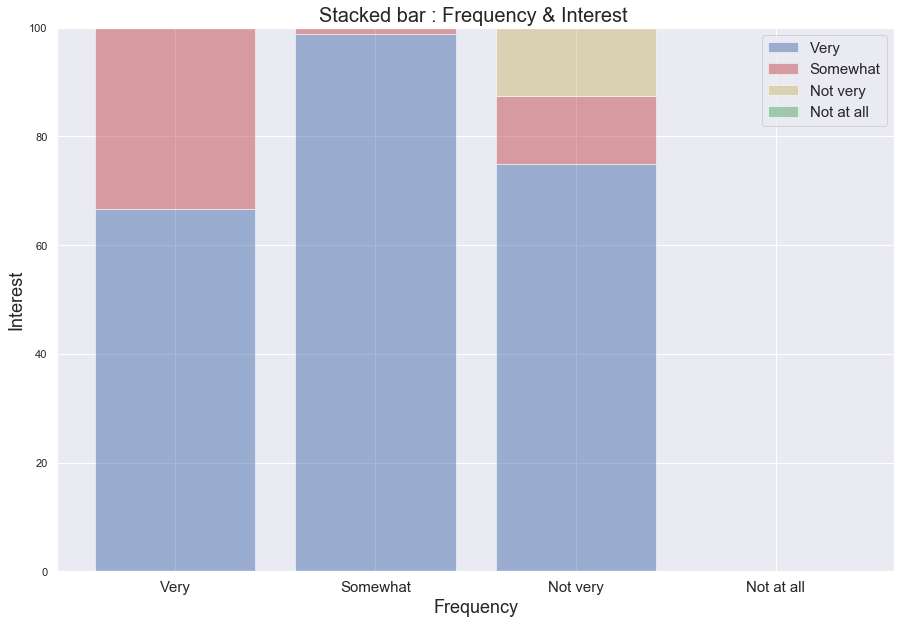

In [52]:
pc_ex_list1,pc_ex_list2, pc_ex_list3, pc_ex_list4 = [], [], [], []
for i in [pc_ex_fq_1, pc_ex_fq_2, pc_ex_fq_3, pc_ex_fq_4]:
    pc_ex_list1.append(i[0])
for i in [pc_ex_fq_1, pc_ex_fq_2, pc_ex_fq_3, pc_ex_fq_4]:
    pc_ex_list2.append(i[1])
for i in [pc_ex_fq_1, pc_ex_fq_2, pc_ex_fq_3, pc_ex_fq_4]:
    pc_ex_list3.append(i[2])
for i in [pc_ex_fq_1, pc_ex_fq_2, pc_ex_fq_3, pc_ex_fq_4]:
    pc_ex_list4.append(i[3])

pc_ex_r_fq_1 = pd.Series(data=pc_ex_list1, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
pc_ex_r_fq_2 = pd.Series(data=pc_ex_list2, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
pc_ex_r_fq_3 = pd.Series(data=pc_ex_list3, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
pc_ex_r_fq_4 = pd.Series(data=pc_ex_list4, index=['Very', 'Somewhat', 'Not very', 'Not at all'])

index = np.arange(0, 4)
alpha = 0.5

p1 = plt.bar(index, pc_ex_r_fq_1, color='b', alpha=alpha)
p2 = plt.bar(index, pc_ex_r_fq_2, color='r', alpha=alpha, bottom=pc_ex_r_fq_1) # stacked bar chart
p3 = plt.bar(index, pc_ex_r_fq_3, color='y', alpha=alpha, bottom=pc_ex_r_fq_1 + pc_ex_r_fq_2) # stacked bar chart
p4 = plt.bar(index, pc_ex_r_fq_4, color='g', alpha=alpha, bottom=pc_ex_r_fq_1 + pc_ex_r_fq_2 + pc_ex_r_fq_3) # stacked bar chart
plt.title('Stacked bar : Frequency & Interest ', fontsize=20)
plt.ylabel('Interest', fontsize=18)
plt.xlabel('Frequency', fontsize=18)
plt.xticks(index, pc_ex_r_fq_1.index, fontsize=15)
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Very', 'Somewhat', 'Not very', 'Not at all'), fontsize=15)
plt.rcParams["figure.figsize"] = 10,3
plt.show()

In [53]:
## PC광고 시청 정도에 따른 PC광고 관심도 (1: 많이 봄, 4: 전혀 보지 않음)

pc_in_1 = usepc.C_12_060[usepc.C_12_029 == 1].value_counts()    ## PC광고를 많이 보는 집단
pc_in_2 = usepc.C_12_060[usepc.C_12_029 == 2].value_counts()    ## PC광고를 어느정도 보는 집단
pc_in_3 = usepc.C_12_060[usepc.C_12_029 == 3].value_counts()    ## PC광고를 별로 보지 않는 집단
pc_in_4 = usepc.C_12_060[usepc.C_12_029 == 4].value_counts()    ## PC광고를 보지 않는 집단

pc_in_fq_1 = pc_in_1 / pc_in_1.sum() * 100
pc_in_fq_2 = pc_in_2 / pc_in_2.sum() * 100
pc_in_fq_3 = pc_in_3 / pc_in_3.sum() * 100
pc_in_fq_4 = pc_in_4 / pc_in_4.sum() * 100

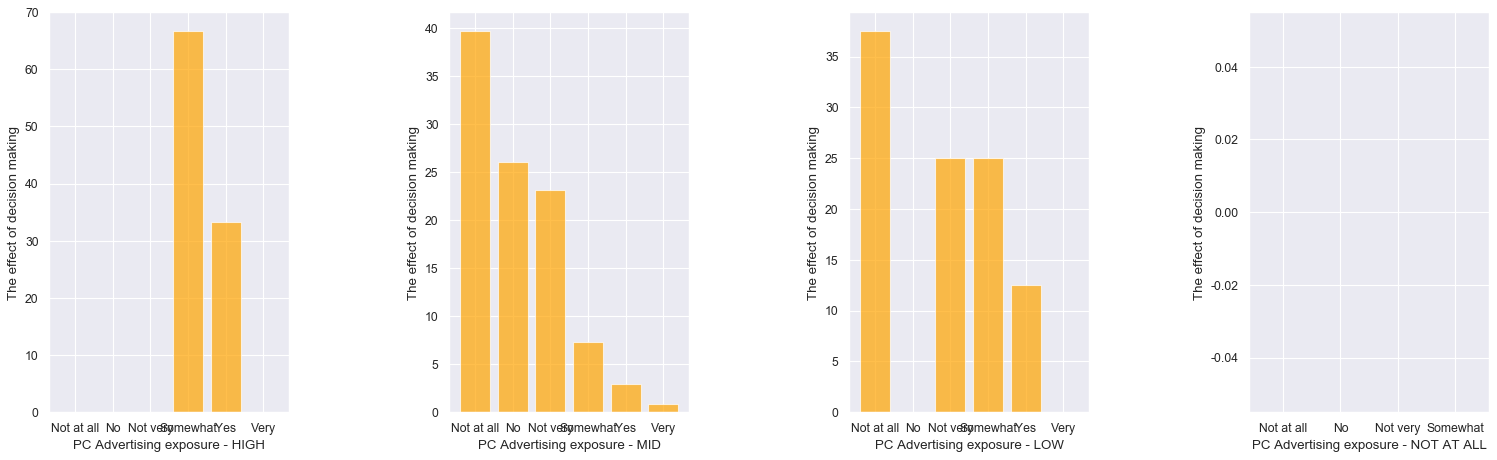

In [54]:
## TV광고 노출도가 제품 구매 의사결정에 영향을 끼치는지. (1 : 많이 보는 편, 4 : 전혀 보지 않음)

pc_in_1 = usepc.C_12_060[usepc.C_12_029 == 1].value_counts()    ## PC광고를 많이 보는 집단
pc_in_2 = usepc.C_12_060[usepc.C_12_029 == 2].value_counts()    ## PC광고를 어느정도 보는 집단
pc_in_3 = usepc.C_12_060[usepc.C_12_029 == 3].value_counts()    ## PC광고를 별로 보지 않는 집단
pc_in_4 = usepc.C_12_060[usepc.C_12_029 == 4].value_counts()    ## PC광고를 보지 않는 집단

pc_in_fq_1 = pc_in_1 / pc_in_1.sum() * 100
pc_in_fq_2 = pc_in_2 / pc_in_2.sum() * 100
pc_in_fq_3 = pc_in_3 / pc_in_3.sum() * 100
pc_in_fq_4 = pc_in_4 / pc_in_4.sum() * 100

pc_in_fq_1.index = ['Somewhat', 'Yes']
pc_in_fq_2.index = ['Not at all', 'No', 'Not very', 'Somewhat', 'Yes', 'Very']
pc_in_fq_3.index = ['Not at all', 'Not very', 'Somewhat', 'Yes']

pc_in_fq_1 = pd.Series(data=pc_in_fq_1, index=['Not at all', 'No', 'Not very', 'Somewhat', 'Yes', 'Very'])
pc_in_fq_1[0] = 0.0
pc_in_fq_1[1] = 0.0
pc_in_fq_1[2] = 0.0
pc_in_fq_1[5] = 0.0
pc_in_fq_3 = pd.Series(data=pc_in_fq_3, index=['Not at all', 'No', 'Not very', 'Somewhat', 'Yes', 'Very'])
pc_in_fq_3[1] = 0.0
pc_in_fq_3[5] = 0.0
pc_in_fq_4 = pd.Series(data=pc_in_fq_4, index=['Not at all', 'No', 'Not very', 'Somewhat', 'Yes', 'Very'])
for i in np.arange(0, 4):
    pc_in_fq_4[i] = 0.0

## C_12_060의 답변 (1: 전혀 아니다, 6: 매우 그렇다)

fig = plt.figure(figsize=(10,5), dpi = 80)
axes4 = fig.add_axes([0, 0, 0.3, 1])
axes5 = fig.add_axes([0.5, 0, 0.3, 1])
axes6 = fig.add_axes([1.0, 0, 0.3, 1])
axes7 = fig.add_axes([1.5, 0, 0.3, 1])

axes4.bar(pc_in_fq_1.index, pc_in_fq_1.values, color = 'orange', alpha=0.7)
axes5.bar(pc_in_fq_2.index, pc_in_fq_2.values, color = 'orange', alpha=0.7)
axes6.bar(pc_in_fq_3.index, pc_in_fq_3.values, color = 'orange', alpha=0.7)
axes7.bar(pc_in_fq_4.index, pc_in_fq_4.values, color = 'orange', alpha=0.7)
axes4.set_xlabel('PC Advertising exposure - HIGH')
axes4.set_ylabel('The effect of decision making')
axes5.set_xlabel('PC Advertising exposure - MID')
axes5.set_ylabel('The effect of decision making')
axes6.set_xlabel('PC Advertising exposure - LOW')
axes6.set_ylabel('The effect of decision making')
axes7.set_xlabel('PC Advertising exposure - NOT AT ALL')
axes7.set_ylabel('The effect of decision making')
plt.show()

- PC광고에 많이 노출되는 사람들은 제품 구매에 영향을 받았다는 결과가 많음
- 오히려 어느정도 노출되는 사람들은 제품 구매에 영향을 전혀 받지 않는다는 의견이 많음
- 별로 노출되지 않는 사람들이 제품 구매의 영향을 많이 받음
- => PC광고가 매우 많이 노출되는 사람들은 제품 구매의 영향을 받지만, 노출 정도가 어느정도 이상이 되지 않으면 크게 관계가 없음 

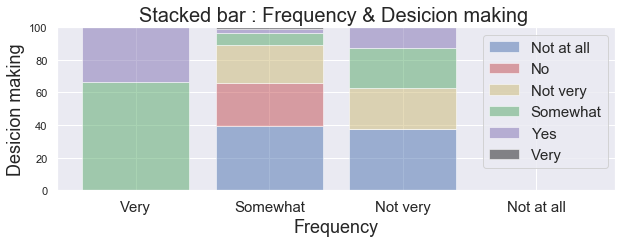

In [55]:
pc_in_list1,pc_in_list2, pc_in_list3, pc_in_list4, pc_in_list5, pc_in_list6 = [], [], [], [], [], []
for i in [pc_in_fq_1, pc_in_fq_2, pc_in_fq_3, pc_in_fq_4]:
    pc_in_list1.append(i[0])
    pc_in_list2.append(i[1])
    pc_in_list3.append(i[2])
    pc_in_list4.append(i[3])
    pc_in_list5.append(i[4])
    pc_in_list6.append(i[5])
    
pc_in_r_fq_1 = pd.Series(data=pc_in_list1, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
pc_in_r_fq_2 = pd.Series(data=pc_in_list2, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
pc_in_r_fq_3 = pd.Series(data=pc_in_list3, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
pc_in_r_fq_4 = pd.Series(data=pc_in_list4, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
pc_in_r_fq_5 = pd.Series(data=pc_in_list5, index=['Very', 'Somewhat', 'Not very', 'Not at all'])
pc_in_r_fq_6 = pd.Series(data=pc_in_list6, index=['Very', 'Somewhat', 'Not very', 'Not at all'])

index = np.arange(0, 4)
alpha = 0.5

p1 = plt.bar(index, pc_in_r_fq_1, color='b', alpha=alpha)
p2 = plt.bar(index, pc_in_r_fq_2, color='r', alpha=alpha, bottom=pc_in_r_fq_1) # stacked bar chart
p3 = plt.bar(index, pc_in_r_fq_3, color='y', alpha=alpha, bottom=pc_in_r_fq_1 + pc_in_r_fq_2) # stacked bar chart
p4 = plt.bar(index, pc_in_r_fq_4, color='g', alpha=alpha, bottom=pc_in_r_fq_1 + pc_in_r_fq_2 + pc_in_r_fq_3) # stacked bar chart
p5 = plt.bar(index, pc_in_r_fq_5, color='m', alpha=alpha, bottom=pc_in_r_fq_1 + pc_in_r_fq_2 + pc_in_r_fq_3 + pc_in_r_fq_4) # stacked bar chart
p6 = plt.bar(index, pc_in_r_fq_6, color='k', alpha=alpha, bottom=pc_in_r_fq_1 + pc_in_r_fq_2 + pc_in_r_fq_3 + pc_in_r_fq_4 + pc_in_r_fq_5 ) # stacked bar chart
plt.title('Stacked bar : Frequency & Desicion making ', fontsize=20)
plt.ylabel('Desicion making', fontsize=18)
plt.xlabel('Frequency', fontsize=18)
plt.xticks(index, pc_in_r_fq_1.index, fontsize=15)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('Not at all', 'No', 'Not very', 'Somewhat', 'Yes', 'Very'), fontsize=15)
plt.rcParams["figure.figsize"] = 15, 10
plt.show()

# Modeling

## 피어슨 상관분석

In [56]:
rawdata2 = pd.read_csv("rawdata(수정).csv")
df2 = rawdata2.copy()

In [57]:
usedata=df2.loc[:,['C_01_011','C_01_012','C_01_014','C_01_015','C_01_016','C_01_017','C_01_018','C_01_019','C_01_020','C_01_021','C_01_022','C_01_023','C_01_024','C_01_025','C_01_033','C_14_007','C_14_009','C_14_010','C_14_011','C_14_012','C_14_013','C_14_014','H_04_014','H_04_016','H_04_024','C_12_029','C_12_031','C_12_033','C_12_034','C_12_035','C_12_036','C_12_037','C_13_025','C_13_026','C_13_027','C_13_028','C_13_029','C_13_030','C_13_031','C_15_019','C_15_020','C_15_021']]

In [58]:
tv=usedata.loc[:,['C_01_011','C_01_012','C_01_014','C_01_015','C_01_016','C_01_017','C_01_018','C_01_019','C_01_020','C_01_021','C_01_022','C_01_023','C_01_024','C_01_025','C_01_033']]
#tv.head() 
#tv만 추출

In [59]:
usetv=tv.dropna(axis=0) #결측값 제거
#usetv.head()

In [60]:
online=usedata.loc[:,['C_14_007','C_14_009','C_14_010','C_14_011','C_14_012','C_14_013','C_14_014']]
#online.head()
#온라인 추출

In [61]:
useonline=online.dropna(axis=0) #결측값 제거
#useonline.head()

In [62]:
pc=usedata.loc[:,['C_12_029','C_12_031','C_12_033','C_12_034','C_12_035','C_12_036','C_12_037']]
#pc.head()
#pc 추출

In [63]:
usepc=pc.dropna(axis=0) #결측값 제거
#usepc.head()

In [64]:
moblie=usedata.loc[:,['C_13_025','C_13_026','C_13_027','C_13_028','C_13_029','C_13_030','C_13_031']]
#moblie.head()
#모바일 추출

In [65]:
usemoblie=moblie.dropna(axis=0) #결측값 제거
#usemoblie.head()

In [66]:
sns_df=usedata.loc[:,['C_15_019','C_15_020','C_15_021']]
#sns_df.head()
#sns 추출

In [67]:
usesns=sns_df.dropna(axis=0) #결측값 제거
#usesns.head()
usesns = pd.DataFrame(usesns)

In [68]:
a=usedata.loc[:,['H_04_014','H_04_016','H_04_024']]
#a.head()

In [69]:
usea=a.dropna(axis=0) #결측값 제거
#usea.head()

In [70]:
etc=usedata.loc[:,['C_01_011','H_04_014','H_04_016','H_04_024']]

In [71]:
useetc=etc.dropna(axis=0) #결측값 제거
#useetc.head()

In [72]:
# usetv의 C_01_011(TV 시청 중 광고 시청 정도)와 나머지 변수들끼리의 상관계수
corr_tv = usetv.corrwith(usetv.C_01_011, method = 'pearson') 
# 데이터프레임으로 바꾸기
corr_tv = pd.DataFrame(corr_tv) 
corr_tv

,0
C_01_011,1.000000
C_01_012,0.620370
C_01_014,-0.475642
C_01_015,-0.457650
C_01_016,-0.417002
C_01_017,-0.435553
C_01_018,-0.412817
C_01_019,-0.443244
C_01_020,-0.352019
C_01_021,-0.359107


In [73]:
# 상관계수 절댓값으로 바꾸기
temp_tv = corr_tv.copy() 

i = 0
for x in temp_tv.values:
    x = abs(x)
    temp_tv.values[i] = x
    i += 1
print(temp_tv)

                 0
C_01_011  1.000000
C_01_012  0.620370
C_01_014  0.475642
C_01_015  0.457650
C_01_016  0.417002
C_01_017  0.435553
C_01_018  0.412817
C_01_019  0.443244
C_01_020  0.352019
C_01_021  0.359107
C_01_022  0.387140
C_01_023  0.408184
C_01_024  0.398985
C_01_025  0.361247
C_01_033  0.149392


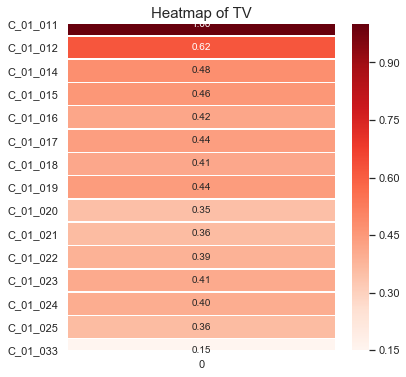

In [74]:
# 상관관계 heatmap
plt.figure(figsize = (6, 6))
sns.heatmap(data = temp_tv, annot = True, fmt = '.2f', linewidths = .5, cmap = 'Reds')
plt.title('Heatmap of TV', fontsize=15)
plt.show() 

### 상관관계 해석
- ±0 ~ 0.4 : 상관관계가 없다고 판단
- ±0.4 ~ 0.7 : 어느정도 상관관계가 있다
- ±0.7 ~ 1.0 : 뚜렷한 상관관계가 있다.

###  TV 광고

- C_01_012(귀하께서 평소 TV를 시청하실 때 광고가 나오면 광고를 얼마나 관심 있게 보십니까?) 
    - Cor 0.6
    - -> 양의 상관관계 -> '관심있게 보지 않는다'
---
- C_01_014(귀하께서는 TV 프로그램을 시청하실 때 접하는 광고들을 얼마나 집중해서 보십니까? - 프로그램 전 광고) 
    - Cor -0.48
    - -> 음의 상관관계 -> '집중해서 보지 않는다'
---
-  C_01_015(귀하께서는 TV 프로그램을 시청하실 때 접하는 광고들을 얼마나 집중해서 보십니까? - 프로그램 후 광고) 
    - Cor -0.46
    - -> 음의 상관관계 -> '집중해서 보지 않는다'

In [75]:
# usepc의 C_12_029(귀하께서는 평소 PC를 통해 인터넷을 이용하시면서 광고(배너광고, 동영상광고, 팝업광고, 검색광고, SNS광고 등을 얼마나 많이 보시는 편입니까?)와 나머지 변수들끼리의 상관계수
corr_pc = usepc.corrwith(usepc.C_12_029, method = 'pearson') 
corr_pc = pd.DataFrame(corr_pc)
corr_pc

,0
C_12_029,1.000000
C_12_031,0.008280
C_12_033,0.049182
C_12_034,-0.110693
C_12_035,-0.106921
C_12_036,-0.109980
C_12_037,-0.155239


In [76]:
# 상관계수 절댓값으로 바꾸기
temp_pc = corr_pc.copy() 

i = 0
for x in temp_pc.values:
    x = abs(x)
    temp_pc.values[i] = x
    i += 1
print(temp_pc)

                 0
C_12_029  1.000000
C_12_031  0.008280
C_12_033  0.049182
C_12_034  0.110693
C_12_035  0.106921
C_12_036  0.109980
C_12_037  0.155239


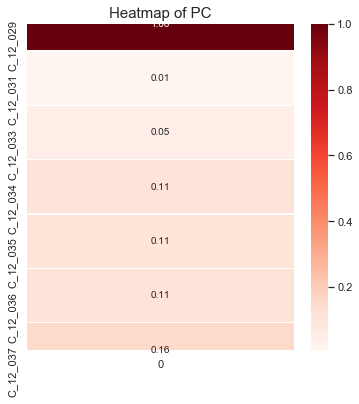

In [77]:
# 상관관계 heatmap
plt.figure(figsize = (6, 6))
sns.heatmap(data = temp_pc, annot = True, fmt = '.2f', linewidths = .5, cmap = 'Reds')
plt.title('Heatmap of PC', fontsize=15)
plt.show() 

### PC 광고
 유의한 상관계수 없음

In [78]:
# usemobile의 C_13_025(귀하께서는 평소 모바일 기기(스마트폰/태블릿PC)를 통해 인터넷을 하실 때 광고를 얼마나 많이 보시는 편입니까?)와 나머지 변수들끼리의 상관계수
corr_mobile = usemoblie.corrwith(usemoblie.C_13_025, method = 'pearson') 
corr_mobile = pd.DataFrame(corr_mobile)
corr_mobile

,0
C_13_025,1.000000
C_13_026,0.295098
C_13_027,0.094486
C_13_028,-0.222774
C_13_029,-0.187006
C_13_030,-0.184022
C_13_031,-0.126069


In [79]:
# 상관계수 절댓값으로 바꾸기
temp_mobile = corr_mobile.copy() 

i = 0
for x in temp_mobile.values:
    x = abs(x)
    temp_mobile.values[i] = x
    i += 1
print(temp_mobile)

                 0
C_13_025  1.000000
C_13_026  0.295098
C_13_027  0.094486
C_13_028  0.222774
C_13_029  0.187006
C_13_030  0.184022
C_13_031  0.126069


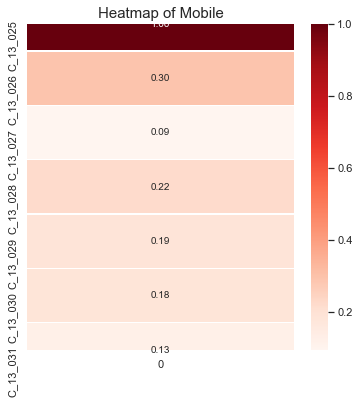

In [80]:
# 상관관계 heatmap
plt.figure(figsize = (6, 6))
sns.heatmap(data = temp_mobile, annot = True, fmt = '.2f', linewidths = .5, cmap = 'Reds')
plt.title('Heatmap of Mobile', fontsize=15)
plt.show() 

### Mobile 광고

- C_13_026(귀하께서 평소 모바일 기기(스마트폰/태블릿PC)를 통해 인터넷을 하실 때 광고가 나오면 광고를 얼마나 관심 있게 보십니까?) 
    - Cor 0.3
    - -> 양의 상관관계 -> '관심있게 보지 않는다'

In [81]:
usesns.head()

,C_15_019,C_15_020,C_15_021
2,2.0,2.0,4.0
3,3.0,4.0,2.0
4,3.0,3.0,2.0
5,3.0,3.0,2.0
6,1.0,1.0,5.0


In [82]:
# usesns의 C_15_019(귀하께서는 평소 SNS(소셜 네트워크 서비스)를 이용하시면서 광고를 얼마나 많이 보시는 편입니까?)와 나머지 변수들끼리의 상관계수
corr_sns = usesns.corrwith(usesns.C_15_019, method = 'pearson') 
corr_sns = pd.DataFrame(corr_sns)
corr_sns

,0
C_15_019,1.000000
C_15_020,0.582641
C_15_021,-0.264399


In [83]:
# 상관계수 절댓값으로 바꾸기
temp_sns = corr_sns.copy() 

i = 0
for x in temp_sns.values:
    x = abs(x)
    temp_sns.values[i] = x
    i += 1
print(temp_sns)

                 0
C_15_019  1.000000
C_15_020  0.582641
C_15_021  0.264399


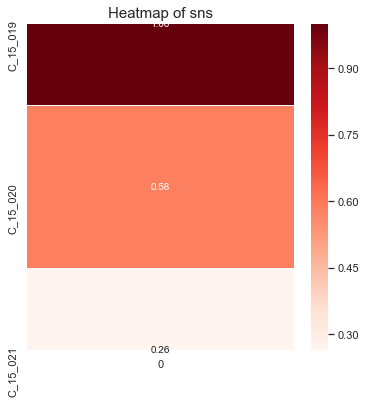

In [84]:
# 상관관계 heatmap
plt.figure(figsize = (6, 6))
sns.heatmap(data = temp_sns, annot = True, fmt = '.2f', linewidths = .5, cmap = 'Reds')
plt.title('Heatmap of sns', fontsize=15)
plt.show() 

### SNS 광고

- C_15_020(귀하께서는 평소 SNS(소셜 네트워크 서비스)를 이용하시면서 광고가 나오면 광고를 얼마나 관심 있게 보십니까?) 
    - Cor 0.58
    - -> 양의 상관관계 -> '관심있게 보지 않는다'

In [85]:
# useetc의 C_01_011(귀하께서는 평소 TV를 시청하시면서 프로그램 전/중간/후에 나오는 광고를 얼마나 많이 보시는 편입니까?)와 나머지 변수들끼리의 상관계수
corr_etc = useetc.corrwith(useetc.C_01_011, method = 'pearson') 
corr_etc = pd.DataFrame(corr_etc)
corr_etc

,0
C_01_011,1.000000
H_04_014,-0.227670
H_04_016,-0.286646
H_04_024,-0.220447


In [86]:
# 상관계수 절댓값으로 바꾸기
temp_etc = corr_etc.copy() 

i = 0
for x in temp_etc.values:
    x = abs(x)
    temp_etc.values[i] = x
    i += 1
print(temp_etc)

                 0
C_01_011  1.000000
H_04_014  0.227670
H_04_016  0.286646
H_04_024  0.220447


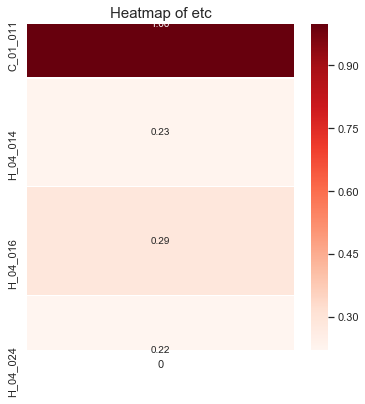

In [87]:
# 상관관계 heatmap
plt.figure(figsize = (6, 6))
sns.heatmap(data = temp_etc, annot = True, fmt = '.2f', linewidths = .5, cmap = 'Reds')
plt.title('Heatmap of etc', fontsize=15)
plt.show() 

### Evaluate

1. 김경수. "인터넷 검색광고의 유형이 광고효과에 미치는 영향에 관한 연구" VOL.-  NO.- (2008)
http://www.riss.kr/search/detail/DetailView.do? p_mat_type=be54d9b8bc7cdb09&control_no=3f84529c4cbc09ceffe0bdc3ef48d419
-> 소비자들이 필요로 인해 광고를 검색하는 경우는 있지만, 
광고 자체가 소비를 일으키는 원인이 되지는 못했다.


2. 김정진. "뉴미디어 수용자의 능동성 정도에 따른 광고 태도 비교 연구" VOL.-  NO.- (2009)
http://www.riss.kr/search/detail/DetailView.do? p_mat_type=be54d9b8bc7cdb09&control_no=e2c9848b0bc9aa74ffe0bdc3ef48d41 9
-> 반복적이고 동일한 광고은 소비자들로 하여금 정보성과 오락성 대신 짜증도만  높일 수 있다.  이에 흥미를 유발할 수 있는 광고를 구성하고 노출하여 소비자들에게  긍정적인 인식을 심어줄 수 있어야 한다.

## 분류 문제 해결

### Make Feature

In [88]:
n = df_opt[df_opt.항목ID == "H_04_014"].index.values
df_opt.loc[n[0]:n[0]+6, ]

,항목ID,항목코드,항목코드명
16809,H_04_014,1,전혀 아니다
16810,NaN,2,아니다
16811,NaN,3,약간 아니다
16812,NaN,4,약간 그렇다
16813,NaN,5,그렇다
16814,NaN,6,매우 그렇다
16815,H_04_015,1,전혀 아니다


In [89]:
n = df_opt[df_opt.항목ID == "H_04_016"].index.values
df_opt.loc[n[0]:n[0]+6, ]

,항목ID,항목코드,항목코드명
16821,H_04_016,1,전혀 아니다
16822,NaN,2,아니다
16823,NaN,3,약간 아니다
16824,NaN,4,약간 그렇다
16825,NaN,5,그렇다
16826,NaN,6,매우 그렇다
16827,H_04_019,1,전혀 아니다


In [90]:
n = df_opt[df_opt.항목ID == "H_04_024"].index.values
df_opt.loc[n[0]:n[0]+6, ]

,항목ID,항목코드,항목코드명
16851,H_04_024,1,전혀 아니다
16852,NaN,2,아니다
16853,NaN,3,약간 아니다
16854,NaN,4,약간 그렇다
16855,NaN,5,그렇다
16856,NaN,6,매우 그렇다
16857,H_04_026,1,전혀 아니다


In [91]:
df['y1_제품신뢰도'] = df['H_04_014'] >= 4
df['y1_제품신뢰도'] = df['y1_제품신뢰도'].astype('int')

df['y2_의사결정도움'] = df['H_04_016'] >= 4
df['y2_의사결정도움'] = df['y2_의사결정도움'].astype('int')

df['y3_구매여부'] = df['H_04_024'] >= 4
df['y3_구매여부'] = df['y3_구매여부'].astype('int')

df.head(10)

,C_01_011,C_01_012,C_01_014,C_01_015,C_01_016,C_01_017,C_01_018,C_01_019,C_01_020,C_01_021,...,C_14_014,C_15_019,C_15_020,C_15_021,H_04_014,H_04_016,H_04_024,y1_제품신뢰도,y2_의사결정도움,y3_구매여부
1,2,2,5,4,4,6,6,6,6,6,...,5,0,0,0,3,4,2,0,1,0
2,2,2,3,2,2,2,3,3,4,2,...,5,0,0,0,5,5,4,1,1,1
3,1,1,5,5,6,6,5,5,4,5,...,0,2,2,4,4,5,4,1,1,1
4,3,4,3,3,3,3,3,2,2,2,...,0,3,4,2,4,3,3,1,0,0
5,2,2,5,4,4,4,3,6,6,5,...,4,3,3,2,3,2,1,0,0,0
6,3,3,2,2,2,2,2,2,2,2,...,0,3,3,2,4,3,4,1,0,1
7,2,2,4,5,4,5,4,4,4,5,...,4,1,1,5,5,4,5,1,1,1
8,4,0,0,0,0,0,0,3,3,2,...,2,0,0,0,3,2,3,0,0,0
9,2,2,4,3,4,4,3,4,4,3,...,3,3,3,1,4,5,4,1,1,1
10,3,3,3,3,3,3,3,3,4,4,...,3,0,0,0,4,4,4,1,1,1


### Split Feature / Label

In [92]:
X = df.iloc[:, :-6].values
y1 = df.iloc[:, -3].values
y2 = df.iloc[:, -2].values
y3 = df.iloc[:, -1].values

print(X.shape, y1.shape, y2.shape, y3.shape)

(4000, 37) (4000,) (4000,) (4000,)


### PCA

In [93]:
from sklearn.decomposition import PCA

In [94]:
cov_mat1 = np.cov(X.T)
eig_vals1, eig_vecs1 = np.linalg.eig(cov_mat1)
eig_vals_total1 = eig_vals1.cumsum()

C:\Users\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0,

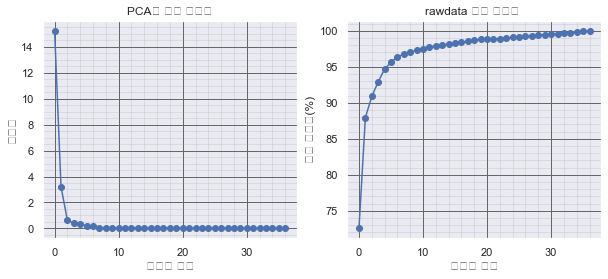

In [95]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.plot(eig_vals1, marker="o")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.title("PCA에 따른 고유값")
plt.xlabel("주성분 개수")
plt.ylabel("고유값")

plt.subplot(1,2,2)
plt.plot(eig_vals_total1/sum(eig_vals1)*100, marker="o")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.title("rawdata 정보 보존량 ")
plt.xlabel("주성분 개수")
plt.ylabel("정보 보존량(%)")
plt.show()

In [96]:
X_pca = PCA(n_components = 4).fit_transform(X)
X_pca

array([[ 2.25781531e+01,  1.08145710e+00,  7.25454142e+00,
         5.44658816e-01],
       [ 1.40594231e+01, -3.33323238e+00,  4.89912628e+00,
         3.13299605e-01],
       [ 1.92903256e+01,  9.17908100e+00,  8.05172975e-02,
        -4.42249808e+00],
       ...,
       [-1.15046654e+00,  2.58360191e-01,  6.44208072e-02,
        -9.57565285e-03],
       [-1.15046654e+00,  2.58360191e-01,  6.44208072e-02,
        -9.57565285e-03],
       [-1.15046654e+00,  2.58360191e-01,  6.44208072e-02,
        -9.57565285e-03]])

### Split Train / Test

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y1_train, y1_test = train_test_split(X_pca, y1, test_size=0.2, random_state=9)
y2_train, y2_test = train_test_split(y2, test_size=0.2, random_state=9)
y3_train, y3_test = train_test_split(y3, test_size=0.2, random_state=9)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

print("y1_train:", y1_train.shape)
print("y1_test:", y1_test.shape)

print("y2_train:", y2_train.shape)
print("y2_test:", y2_test.shape)

print("y3_train:", y3_train.shape)
print("y3_test:", y3_test.shape)

X_train: (3200, 4)
X_test: (800, 4)
y1_train: (3200,)
y1_test: (800,)
y2_train: (3200,)
y2_test: (800,)
y3_train: (3200,)
y3_test: (800,)


### 제품 신뢰도

#### Train Model

##### 로지스틱 회귀

In [98]:
from sklearn.linear_model import LogisticRegression

classifier_log = LogisticRegression()
classifier_log.fit(X_train, y1_train)

C:\Users\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

##### SVM

In [99]:
from sklearn import svm

classifier_svm = svm.SVC(gamma='scale')
classifier_svm.fit(X_train, y1_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Predict

In [100]:
y_pred_log = classifier_log.predict(X_test)
y_pred_svm = classifier_svm.predict(X_test)

#### Evaluate

In [101]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y1_test, y_pred_log))
print(accuracy_score(y1_test, y_pred_svm))

0.975
0.9725


### 의사결정 도움

#### Train Model

##### 로지스틱 회귀

In [102]:
classifier_log = LogisticRegression()
classifier_log.fit(X_train, y2_train)

C:\Users\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

##### SVM

In [103]:
classifier_svm = svm.SVC(gamma='scale')
classifier_svm.fit(X_train, y2_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Predict

In [104]:
y_pred_log = classifier_log.predict(X_test)
y_pred_svm = classifier_svm.predict(X_test)

#### Evaluate

In [105]:
print(accuracy_score(y2_test, y_pred_log))
print(accuracy_score(y2_test, y_pred_svm))

0.98375
0.98


### 구매 여부

#### Train Model

##### 로지스틱 회귀

In [106]:
classifier_log = LogisticRegression()
classifier_log.fit(X_train, y3_train)

C:\Users\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

##### SVM

In [107]:
classifier_svm = svm.SVC(gamma='scale')
classifier_svm.fit(X_train, y3_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Predict

In [108]:
y_pred_log = classifier_log.predict(X_test)
y_pred_svm = classifier_svm.predict(X_test)

#### Evaluate

In [109]:
print(accuracy_score(y3_test, y_pred_log))
print(accuracy_score(y3_test, y_pred_svm))

0.98
0.97375
